In [3]:
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import math

In [6]:
repeats = pd.read_csv("../references/repeats.bed", sep = "\t", header = None)

In [ ]:
%%bash
for SAMP in $( ls /storage/home/nsl5160/scratch/brook_trout/mapped/*.markdup.bam | cut -d"/" -f8 | cut -d"." -f1 ); do
    ../PanDepth-2.25-Linux-x86_64/pandepth \
        -i /storage/home/nsl5160/scratch/brook_trout/mapped/${SAMP}.markdup.bam \
        -t 8 \
        -b ../references/repeats.bed \
        -o /storage/home/nsl5160/scratch/brook_trout/mapped/${SAMP}_repeats
done

INFO: Input data read done
INFO: Input data read done


In [20]:
repeats["len"].sum() / 2496201734

0.555004066830762

In [2]:
!../PanDepth-2.25-Linux-x86_64/pandepth --help

Usage: pandepth -i in.bam [-g gene.gff | -b region.bed] -o outPrefix
 Input/Output options:
   -i    <str>     input of sam/bam/cram/paf or #.list file
   -o    <str>     prefix of output file
 Target options:
   -g    <str>     input gff/gtf file for gene region
   -f    <str>     gff/gtf feature type to parse, CDS or exon [CDS]
   -b    <str>     input bed file for list of regions
   -w    <int>     windows size (bp)
   -a              output all the site depth
 Filter options:
   -q    <int>     min mapping quality [0]
   -x    <int>     exclude reads with any of the bits in FLAG set [1796]
 Other options:
   -t    <int>     number of threads [3]
   -r    <str>     reference genome file for cram decode or GC parse
   -c              enable the calculation of GC content (requires -r)
   -h              show this help [v2.25]



In [ ]:
%%bash
for SAMP in $( ls /storage/home/nsl5160/scratch/brook_trout/mapped/*.markdup.bam | cut -d"/" -f8 | cut -d"." -f1 ); do
    ../PanDepth-2.25-Linux-x86_64/pandepth \
        -i /storage/home/nsl5160/scratch/brook_trout/mapped/${SAMP}.markdup.bam \
        -t 8 \
        -w 10000 \
        -b <( head -1 ../references/sfon.bed ) \
        -o /storage/home/nsl5160/scratch/brook_trout/mapped/${SAMP}
done

INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
INFO: Input data read done
I

In [2]:
depths = []
for file in glob.glob("/storage/home/nsl5160/scratch/brook_trout/mapped/*.win.stat.gz"):
    tmp = pd.read_csv(file, 
                comment = "#", compression = "gzip", sep = "\t", header = None)
    tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
    depths = depths + [tmp[7].median()]

/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/

/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/

/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/

/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/

/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/ipykernel_2403320/3369074147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp.loc[tmp[0].str.contains("NC")][tmp[3] == 10000].reset_index(drop=True)
/tmp/

In [3]:
samps = [i.split("/")[7].split(".")[0] for i in glob.glob("/storage/home/nsl5160/scratch/brook_trout/mapped/*.win.stat.gz")]

In [4]:
depths = pd.DataFrame([samps, depths]).T

In [5]:
depths.columns = ["Sample_ID", "Coverage"]

In [23]:
meta = pd.read_csv("../ST_metadata.csv")

In [24]:
meta = meta.merge(depths, how = "left", on = "Sample_ID")

In [8]:
strains = ["Assinica", "Little Tupper", "Temiscamie", "Windfall", "Domestic", "Horn"]

In [10]:
for strain in strains:
    print(strain, meta["Coverage"][meta["Source"] == strain].mean())

Assinica 0.8093333333333335
Little Tupper 0.8335714285714283
Temiscamie 0.938
Windfall 0.8379999999999999
Domestic 0.6593333333333332
Horn 0.827857142857143


In [9]:
meta = meta[~meta["Sample_ID"].isin(["Horn_8", "MD31_C", "Tu_6", "VT2_E", "VT2_F"])].reset_index(drop=True)

In [10]:
meta.loc[meta["Source"] == "Domestic", "Water"] = "Hatchery"
meta.loc[meta["Source"] == "Domestic", "Strain"] = "Domestic"

In [12]:
bed = pd.read_csv("../references/sfon.bed", sep = "\t", header = None)

In [11]:
meta["filename"] = "/storage/home/nsl5160/scratch/brook_trout/mapped/" + meta["Sample_ID"] + ".markdup.bam"

In [15]:
for strain in strains:
    meta[["filename"]][meta["Source"] == strain].to_csv("../" + strain.replace(" ", "_") + ".bamlist", header = None, index = False)

In [16]:
meta[["filename"]][meta["Source"].str.contains("North Carolina|Tennessee")].to_csv("../appalachian.bamlist", header = None, index = False)

In [21]:
hatchery = (meta[meta["Water"] == "Hatchery"]
 .sort_values(["Strain", "Coverage"], ascending = True)).reset_index(drop=True)

In [24]:
wild = meta[meta["Water"] != "Hatchery"].reset_index(drop=True)

In [26]:
hatchery[["filename"]].to_csv("../hatchery.bamlist", header = None, index = False)
wild[["filename"]].to_csv("../wild.bamlist", header = None, index = False)

In [9]:
%%bash
perl -lne 'if(/^(>.*)/){ $head=$1 } else { $fa{$head} .= $_ } END{ foreach $s (sort(keys(%fa))){ print "$s\n$fa{$s}\n" }}' \
    ../references/sfon.fa > ../references/sfon.1line.fasta

In [10]:
%%bash
perl -lne 'if(/^>(\S+)/){ $n=$1} else { while(/([a-z]+)/g){ printf("%s\t%d\t%d\n",$n,pos($_)-length($1),pos($_)) } }' \
    ../references/sfon.1line.fasta > ../references/sfon.softmasked.bed

In [22]:
%%bash
source ~/.bashrc
conda activate ipyrad
bedtools subtract -a ../references/sfon.bed -b ../references/sfon.softmasked.bed \
    > ../references/sfon_norepeats.bed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [59]:
%%bash
source ~/.bashrc
conda activate angsd
cat ../references/sfon_norepeats.bed | awk '{print $1"\t"$2+1"\t"$3}' \
    | sort -k1 | grep "^NC" > ../references/no_repeats_regions_list_chrs.txt
angsd sites index ../references/no_repeats_regions_list_chrs.txt

	-> Indexing ../references/no_repeats_regions_list_chrs.txt and will add '0' to pos column
	-> Filterfile: ../references/no_repeats_regions_list_chrs.txt supplied will generate binary representations... 
	-> Input file has 3 columns(bed), chr posStart posStop
	-> Writing chr:'NC_074665.1' 
	-> Writing chr:'NC_074666.1' 
	-> Writing chr:'NC_074667.1' 
	-> Writing chr:'NC_074668.1' 
	-> Writing chr:'NC_074669.1' 
	-> Writing chr:'NC_074670.1' 
	-> Writing chr:'NC_074671.1' 
	-> Writing chr:'NC_074672.1' 
	-> Writing chr:'NC_074673.1' 
	-> Writing chr:'NC_074674.1' 
	-> Writing chr:'NC_074675.1' 
	-> Writing chr:'NC_074676.1' 
	-> Writing chr:'NC_074677.1' 
	-> Writing chr:'NC_074678.1' 
	-> Writing chr:'NC_074679.1' 
	-> Writing chr:'NC_074680.1' 
	-> Writing chr:'NC_074681.1' 
	-> Writing chr:'NC_074682.1' 
	-> Writing chr:'NC_074683.1' 
	-> Writing chr:'NC_074684.1' 
	-> Writing chr:'NC_074685.1' 
	-> Writing chr:'NC_074686.1' 
	-> Writing chr:'NC_074687.1' 
	-> Writing chr:'NC_074688.

In [30]:
meta[["filename"]].to_csv("../all_samples.bamlist", header = None, index = False)

In [71]:
for strain in ["wild", "hatchery"]:
    for i in bed[0][bed[0].str.contains("NC")].tolist():
        task = "sfs_input_fst"
        mem = "100"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/saf_fst"
        outprefix = strain.replace(" ", "_") + "_" + i
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list.txt"
        ref = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             sitesfile + " " + regions + " " + ref], shell=True)

Submitted batch job 32516190
Submitted batch job 32516191
Submitted batch job 32516192
Submitted batch job 32516193
Submitted batch job 32516195
Submitted batch job 32516196
Submitted batch job 32516197
Submitted batch job 32516198
Submitted batch job 32516199
Submitted batch job 32516200
Submitted batch job 32516201
Submitted batch job 32516202
Submitted batch job 32516203
Submitted batch job 32516204
Submitted batch job 32516205
Submitted batch job 32516206
Submitted batch job 32516207
Submitted batch job 32516208
Submitted batch job 32516209
Submitted batch job 32516210
Submitted batch job 32516211
Submitted batch job 32516213
Submitted batch job 32516214
Submitted batch job 32516215
Submitted batch job 32516216
Submitted batch job 32516217
Submitted batch job 32516218
Submitted batch job 32516219
Submitted batch job 32516220
Submitted batch job 32516221
Submitted batch job 32516222
Submitted batch job 32516223
Submitted batch job 32516224
Submitted batch job 32516225
Submitted batc

In [16]:
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "sfs_calc"
    mem = "128"
    cpus = "10"
    indir = "/storage/home/nsl5160/scratch/brook_trout/saf_fst/"
    strain1 = "wild_" + i
    strain2 = "hatchery_" + i
    outdir = "/storage/home/nsl5160/scratch/brook_trout/fst_scans/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + outdir], shell=True)

Submitted batch job 32630211
Submitted batch job 32630212
Submitted batch job 32630213
Submitted batch job 32630214
Submitted batch job 32630215
Submitted batch job 32630216
Submitted batch job 32630217
Submitted batch job 32630218
Submitted batch job 32630219
Submitted batch job 32630220
Submitted batch job 32630221
Submitted batch job 32630223
Submitted batch job 32630224
Submitted batch job 32630225
Submitted batch job 32630226
Submitted batch job 32630227
Submitted batch job 32630228
Submitted batch job 32630229
Submitted batch job 32630230
Submitted batch job 32630231
Submitted batch job 32630232
Submitted batch job 32630233
Submitted batch job 32630234
Submitted batch job 32630235
Submitted batch job 32630236
Submitted batch job 32630240
Submitted batch job 32630244
Submitted batch job 32630246
Submitted batch job 32630247
Submitted batch job 32630248
Submitted batch job 32630249
Submitted batch job 32630250
Submitted batch job 32630251
Submitted batch job 32630252
Submitted batc

In [7]:
!cat ../sfs_calc.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_2dsfs

source ~/.bashrc
conda activate angsd

INDIR=$1
PREFIX1=$2
PREFIX2=$3
OUTDIR=$4

cd $SLURM_SUBMIT_DIR
cd ${INDIR}

mkdir -p ${OUTDIR}

winsfs -v --threads ${SLURM_NTASKS} \
    ${PREFIX1}.saf.idx \
    ${PREFIX2}.saf.idx \
    > ${OUTDIR}/${PREFIX1}.${PREFIX2}.ml

winsfs view --fold \
    ${OUTDIR}/${PREFIX1}.${PREFIX2}.ml \
    | grep -v "^#" \
    > ${OUTDIR}/${PREFIX1}.${PREFIX2}.folded.ml


In [54]:
!ls /storage/home/nsl5160/scratch/brook_trout/fst_scans/*folded* | sed "s:.folded.ml::g" \
    | rev | cut -d"_" -f1-2 | rev > done.txt

In [65]:
for i in ([i for i in bed[0][bed[0].str.contains("NC")].tolist() if i not in pd.read_csv("done.txt", header = None)[0].tolist()] + ["NC_074676.1"]):
    task = "sfs_calc"
    mem = "200"
    cpus = "10"
    indir = "/storage/home/nsl5160/scratch/brook_trout/saf_fst/"
    strain1 = "wild_" + i
    strain2 = "hatchery_" + i
    outdir = "/storage/home/nsl5160/scratch/brook_trout/fst_scans/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + outdir], shell=True)

Submitted batch job 32680114
Submitted batch job 32680115
Submitted batch job 32680116
Submitted batch job 32680117
Submitted batch job 32680118
Submitted batch job 32680119
Submitted batch job 32680120
Submitted batch job 32680121


In [196]:
!grep "^AF" ../references/sfon_with_mito.bed > ../references/mito.bed

In [66]:
for samp in meta["Sample_ID"].tolist():
    task = "dnapipe_slurm"
    mem = "64"
    cpus = "8"
    indir = "/storage/home/nsl5160/scratch/brook_trout/mapped/"
    infile = samp
    outdir = "/storage/home/nsl5160/scratch/brook_trout/dnapipete/" + samp
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + infile + " " + outdir], shell=True)

Submitted batch job 32680124
Submitted batch job 32680125
Submitted batch job 32680126
Submitted batch job 32680127
Submitted batch job 32680128
Submitted batch job 32680129
Submitted batch job 32680130
Submitted batch job 32680131
Submitted batch job 32680132
Submitted batch job 32680133
Submitted batch job 32680134
Submitted batch job 32680135
Submitted batch job 32680136
Submitted batch job 32680137
Submitted batch job 32680138
Submitted batch job 32680139
Submitted batch job 32680140
Submitted batch job 32680141
Submitted batch job 32680142
Submitted batch job 32680143
Submitted batch job 32680144
Submitted batch job 32680145
Submitted batch job 32680146
Submitted batch job 32680147
Submitted batch job 32680148
Submitted batch job 32680149
Submitted batch job 32680150
Submitted batch job 32680151
Submitted batch job 32680152
Submitted batch job 32680153
Submitted batch job 32680154
Submitted batch job 32680155
Submitted batch job 32680156
Submitted batch job 32680157
Submitted batc

In [ ]:
gp

In [138]:
meta.sort_values("Coverage").head(60)

,Sample_ID,FISH_N,Strain,Source,Water,NY Native?,Notes,Batch,Coverage
172,Tu_6,NaN,NaN,Tunis Lake,NaN,NaN,NaN,2,0.0
132,MD31_C,NaN,NaN,Maryland,NaN,NaN,NaN,2,0.03
176,VT2_F,NaN,NaN,Vermont,NaN,NaN,NaN,2,0.03
175,VT2_E,NaN,NaN,Vermont,NaN,NaN,NaN,2,0.03
126,HP_12,NaN,NaN,Maine,NaN,NaN,NaN,2,0.04
131,MD31_B,NaN,NaN,Maryland,NaN,NaN,NaN,2,0.11
167,RPR_9,NaN,NaN,Tennessee,NaN,NaN,NaN,2,0.13
130,MD31_A,NaN,NaN,Maryland,NaN,NaN,NaN,2,0.19
98,DNL_4,NaN,NaN,Dickson Lake,NaN,NaN,NaN,2,0.19
89,LML22_41,NaN,Unknown,Little Moose,Little Moose,Unknown,NaN,1,0.2


In [15]:
!squeue -u nsl5160

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          32508739      open fst_inpu  nsl5160 PD       0:00      1 (QOSMaxCpuPerUserLimit)
          32508738      open fst_inpu  nsl5160 PD       0:00      1 (QOSMaxCpuPerUserLimit)
          32508737      open fst_inpu  nsl5160 PD       0:00      1 (QOSMaxCpuPerUserLimit)
          32508736      open fst_inpu  nsl5160 PD       0:00      1 (QOSMaxCpuPerUserLimit)
          32508734      open fst_inpu  nsl5160  R       0:04      1 p-bc-5062
          32508735      open fst_inpu  nsl5160  R       0:04      1 p-sc-2445
          32508733      open fst_inpu  nsl5160  R       1:39      1 p-sc-2461
          32508731      open fst_inpu  nsl5160  R       3:46      1 p-bc-5145
          32508732      open fst_inpu  nsl5160  R       3:46      1 p-sc-2354
          32508729      open fst_inpu  nsl5160  R       4:18      1 p-bc-5131
          32508730      open fst_inpu  nsl5160  R       4:18      1 p-sc-2340
 

In [34]:
for i in names:
    task = "bwa_sambamba_sort_markdup"
    mem = "128"
    cpus = "20"
    inpath = "/storage/home/nsl5160/scratch/brook_trout/mapped"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/mapped"
    prefix = i
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         inpath + " " + outpath + " " + prefix], shell=True)

Submitted batch job 32511673
Submitted batch job 32511675
Submitted batch job 32511676
Submitted batch job 32511677
Submitted batch job 32511679
Submitted batch job 32511680
Submitted batch job 32511681
Submitted batch job 32511682
Submitted batch job 32511683
Submitted batch job 32511684
Submitted batch job 32511685
Submitted batch job 32511686
Submitted batch job 32511687
Submitted batch job 32511688
Submitted batch job 32511689
Submitted batch job 32511690
Submitted batch job 32511691
Submitted batch job 32511692
Submitted batch job 32511693
Submitted batch job 32511694
Submitted batch job 32511695
Submitted batch job 32511696
Submitted batch job 32511697
Submitted batch job 32511698
Submitted batch job 32511699
Submitted batch job 32511700
Submitted batch job 32511701
Submitted batch job 32511702
Submitted batch job 32511703
Submitted batch job 32511704
Submitted batch job 32511705
Submitted batch job 32511706
Submitted batch job 32511707
Submitted batch job 32511708
Submitted batc

In [35]:
!cat ./slurm-32511673.out

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
Wed Feb 12 16:11:22 EST 2025

sambamba 0.7.1
 by Artem Tarasov and Pjotr Prins (C) 2012-2019
    LDC 1.20.0 / DMD v2.090.1 / LLVM7.0.0 / bootstrap LDC - the LLVM D compiler (0.17.6)

Wed Feb 12 16:12:01 EST 2025


In [31]:
!cat ../bwa_sambamba_sort_markdup.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=bwamem
#SBATCH --account=open

source ~/.bashrc
conda activate ipyrad

INPATH=$1
OUTPATH=$2
PREFIX=$3

cd $SLURM_SUBMIT_DIR
mkdir -p ${OUTPATH}

date
#bwa mem -t ${SLURM_NTASKS} -h 500 -R $(echo "@RG\tID:${PREFIX}\tSM:${PREFIX}\tLB:${PREFIX}\tPL:ILLUMINA") \
#	../references/sfon_with_mito.fa \
#        ${INPATH}/${PREFIX}_val_1.fq.gz \
#        ${INPATH}/${PREFIX}_val_2.fq.gz \
#        | sambamba view -t ${SLURM_NTASKS} -S -f bam -o /dev/stdout /dev/stdin \
#        | sambamba sort -t ${SLURM_NTASKS} -o /dev/stdout /dev/stdin \
#        > ${OUTPATH}/${PREFIX}.bam

#cd ${OUTPATH}
#sambamba index -t ${SLURM_NTASKS} ${PREFIX}.bam
#sambamba markdup -t ${SLURM_NTASKS} --tmpdir=../tmp \
#        ./${PREFIX}.bam \
#        ./${PREFIX}.markdup.bam
sambamba index -t ${SLURM_NTASKS} ./${PREFIX}.markdup.bam #&& rm ./${PREFIX}.bam && rm ./${PREFIX}.bam.bai
date


In [ ]:
# NOTES
# * Prior to calculating Dxy the following steps are recommended:
#   1. Run ANGSD with all populations with a -SNP_pval and -skipTriallelic flags.
#   2. Rerun ANGSD per population 
#       Use the -sites flag with a file corresponding to the recovered SNPs.
#       This will guarantee that sites with an allele fixed in one population is still included.
#       Remove the -SNP_pval flag.
#       IMPORTANT: Include an outgroup reference to polarize alleles.
#   3. Gunzip the resulting mafs files.

In [51]:
!cat ../wild.bamlist ../hatchery.bamlist > ../wild_and_hatchery.bamlist

In [ ]:
for strain in ["wild_and_hatchery"]:
    for i in bed[0].head(42).tolist():
        task = "angsd"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/"
        outprefix = strain.replace(" ", "_") + "_" + i
        minmaf = "0.05"
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ninds = "2" #very lenient here as we have coverage < 1. We will filter once we have a preliminary set of snps
        anc = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             minmaf + " " + regions + " " + sitesfile + " " + ninds + " " + anc], shell=True)

Submitted batch job 31857966
Submitted batch job 31857967
Submitted batch job 31857968
Submitted batch job 31857969
Submitted batch job 31857970
Submitted batch job 31857971
Submitted batch job 31857972
Submitted batch job 31857973
Submitted batch job 31857974
Submitted batch job 31857975
Submitted batch job 31857976
Submitted batch job 31857977
Submitted batch job 31857978
Submitted batch job 31857979
Submitted batch job 31857980
Submitted batch job 31857981
Submitted batch job 31857982
Submitted batch job 31857983
Submitted batch job 31857984
Submitted batch job 31857985
Submitted batch job 31857986
Submitted batch job 31857987
Submitted batch job 31857988
Submitted batch job 31857989
Submitted batch job 31857990
Submitted batch job 31857991
Submitted batch job 31857992
Submitted batch job 31857993
Submitted batch job 31857994
Submitted batch job 31857995
Submitted batch job 31857996
Submitted batch job 31857997
Submitted batch job 31857998
Submitted batch job 31857999
Submitted batc

In [139]:
allpos = pd.DataFrame()
for i in bed[0].head(42).tolist():
    chunk = pd.read_csv("~/scratch/wild_and_hatchery_" + i + ".pos.gz", sep = "\t")
    allpos = pd.concat([allpos, chunk]).reset_index(drop=True)

In [140]:
q1 = np.percentile(allpos["totDepth"], 25)
q3 = np.percentile(allpos["totDepth"], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [141]:
allpos = allpos[allpos["totDepth"] > lower_bound][allpos["totDepth"] < upper_bound].reset_index(drop=True)

In [147]:
allpos[["chr", "pos"]].to_csv("../references/wild_and_hatchery.pos.txt", 
                              sep = "\t", header = None, index = False)

In [148]:
%%bash
source ~/.bashrc
conda activate angsd
angsd sites index ../references/wild_and_hatchery.pos.txt

	-> Indexing ../references/wild_and_hatchery.pos.txt and will add '0' to pos column
	-> Filterfile: ../references/wild_and_hatchery.pos.txt supplied will generate binary representations... 
	-> Input file has 2 columns, chr pos
	-> Writing chr:'NC_074665.1' 
	-> Writing chr:'NC_074666.1' 
	-> Writing chr:'NC_074667.1' 
	-> Writing chr:'NC_074668.1' 
	-> Writing chr:'NC_074669.1' 
	-> Writing chr:'NC_074670.1' 
	-> Writing chr:'NC_074671.1' 
	-> Writing chr:'NC_074672.1' 
	-> Writing chr:'NC_074673.1' 
	-> Writing chr:'NC_074674.1' 
	-> Writing chr:'NC_074675.1' 
	-> Writing chr:'NC_074676.1' 
	-> Writing chr:'NC_074677.1' 
	-> Writing chr:'NC_074678.1' 
	-> Writing chr:'NC_074679.1' 
	-> Writing chr:'NC_074680.1' 
	-> Writing chr:'NC_074681.1' 
	-> Writing chr:'NC_074682.1' 
	-> Writing chr:'NC_074683.1' 
	-> Writing chr:'NC_074684.1' 
	-> Writing chr:'NC_074685.1' 
	-> Writing chr:'NC_074686.1' 
	-> Writing chr:'NC_074687.1' 
	-> Writing chr:'NC_074688.1' 
	-> Writing chr:'NC_074689.1

In [104]:
for i in bed[0].head(1).tolist():
    for strain in ["wild", "hatchery"]:
        task = "angsd_dxy"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/"
        outprefix = strain.replace(" ", "_") + "_" + i
        minmaf = "0" #imparting no filtering that would eliminate our ability to perform dxy analyses
        regions = i + ":"
        sitesfile = "../references/wild_and_hatchery.pos.txt"
        ninds = "0" #again, imparting no filtering that would eliminate our ability to perform dxy analyses
        anc = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             minmaf + " " + regions + " " + sitesfile + " " + ninds + " " + anc], shell=True)

Submitted batch job 31910497
Submitted batch job 31910498


In [84]:
!cat ./slurm-31910395.out

cat: ./slurm-31910395.out: No such file or directory


In [1]:
%%bash
source ~/.bashrc
conda activate angsd
../ngsPopGen/ngsStat -npop 2 \
    -postfiles  \
    pop2.saf \
    -nsites 1000 \
    -iswin 1 \
    -nind 10 10 \
    -outfile pops.stat \
    -verbose 0 \
    -block_size 100

	->Error opening FILE handle for file:pop1.saf exiting


In [116]:
!zcat /storage/home/nsl5160/scratch/wild_NC_074665.1.mafs.gz | wc -l

388691


In [115]:
!zcat /storage/home/nsl5160/scratch/hatchery_NC_074665.1.mafs.gz | wc -l

388825


In [117]:
!ls -lh /storage/home/nsl5160/scratch/wild_NC_074665.1*

-rw-rw-r-- 1 nsl5160 nsl5160_collab  11K Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.arg
-rw-rw-r-- 1 nsl5160 nsl5160_collab  17M Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.beagle.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 7.9M Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.counts.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 9.1M Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.hwe.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 4.4M Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.mafs.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 1.5M Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.pos.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab  85M Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.saf.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab   67 Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.saf.idx
-rw-rw-r-- 1 nsl5160 nsl5160_collab 800K Jan 27 21:14 /storage/home/nsl5160/scratch/wild_NC_074665.1.saf.pos.gz
-rw-rw-r-- 1 nsl516

In [118]:
!ls -lh /storage/home/nsl5160/scratch/hatchery_NC_074665.1*

-rw-rw-r-- 1 nsl5160 nsl5160_collab  11K Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.arg
-rw-rw-r-- 1 nsl5160 nsl5160_collab  19M Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.beagle.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 9.2M Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.counts.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 9.1M Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.hwe.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 4.4M Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.mafs.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab 1.6M Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.pos.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab  76M Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.saf.gz
-rw-rw-r-- 1 nsl5160 nsl5160_collab   67 Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074665.1.saf.idx
-rw-rw-r-- 1 nsl5160 nsl5160_collab 800K Jan 27 21:13 /storage/home/nsl5160/scratch/hatchery_NC_074

In [119]:
tmp = pd.read_csv("/storage/home/nsl5160/scratch/hatchery_NC_074665.1.mafs.gz", sep = "\t")

In [120]:
tmp1 = pd.read_csv("/storage/home/nsl5160/scratch/wild_NC_074665.1.mafs.gz", sep = "\t")

In [122]:
tmp1[~tmp1["position"].isin(tmp["position"])]

,chromo,position,major,minor,anc,knownEM,pK-EM,nInd
2574,NC_074665.1,581618,A,G,A,0.435363,0.000000e+00,5
4678,NC_074665.1,1170769,C,A,C,0.459744,3.063751e-09,4
4679,NC_074665.1,1170783,T,C,C,0.499796,1.060263e-13,5
4682,NC_074665.1,1170942,T,A,T,0.333365,1.768729e-07,3
5108,NC_074665.1,1234053,C,T,T,0.499997,1.952228e-08,3
...,...,...,...,...,...,...,...,...
386022,NC_074665.1,101045044,G,A,G,0.480137,0.000000e+00,5
386023,NC_074665.1,101045049,T,C,T,0.343551,6.359195e-09,5
386024,NC_074665.1,101045054,T,G,T,0.480137,0.000000e+00,5
386025,NC_074665.1,101045056,A,G,A,0.480137,0.000000e+00,5


In [121]:
tmp[~tmp["position"].isin(tmp1["position"])]

,chromo,position,major,minor,anc,knownEM,pK-EM,nInd
847,NC_074665.1,256346,A,T,T,0.404539,1.682210e-12,5
2148,NC_074665.1,468804,A,C,C,0.488275,0.000000e+00,12
2345,NC_074665.1,514368,T,G,G,0.500000,3.987053e-08,2
2560,NC_074665.1,548871,T,C,C,0.312097,3.368471e-08,6
2561,NC_074665.1,548915,T,C,C,0.312097,3.368471e-08,6
...,...,...,...,...,...,...,...,...
386154,NC_074665.1,101044852,A,G,G,0.312120,1.479783e-11,4
386155,NC_074665.1,101044870,T,A,T,0.312145,3.605671e-12,5
386156,NC_074665.1,101044883,T,G,G,0.428590,8.881784e-16,5
386157,NC_074665.1,101044894,A,T,T,0.312092,3.375557e-08,5


In [103]:
!zcat /storage/home/nsl5160/scratch/hatchery_NC_074665.1.mafs.gz | wc -l

23244


In [101]:
!zcat /storage/home/nsl5160/scratch/wild_NC_074665.1.mafs.gz | wc -l

21965


In [100]:
!zcat /storage/home/nsl5160/scratch/wild_NC_074665.1.snpStat.gz | head -2

Chromo	Position	+Major +Minor -Major -Minor	SB1:SB2:SB3	HWE_LRT:HWE_pval	baseQ_Z:baseQ_pval	mapQ_Z:mapQ_pval	edge_z:edge_pval
NC_074665.1	72127	11 0 10 0	-nan:0.000000:1.000000	-0.002864:1.000000e+00	-nan:nan	-nan:nan	-nan:nan

gzip: stdout: Broken pipe


In [99]:
!zcat /storage/home/nsl5160/scratch/hatchery_NC_074665.1.snpStat.gz | head


gzip: /storage/home/nsl5160/scratch/hatchery_NC_074665.1.snpStat.gz: unexpected end of file


In [ ]:
-snp_pval 2 -sb_pval 2 -qscore_pval 2 -hwe_pval 2 -edge_pval 2

In [33]:
!cat ../wild.bamlist ../hatchery.bamlist > ../wild_and_hatchery.bamlist

In [ ]:
for strain in ["Domestic"]:
    for i in bed[0].head(42).tolist():
        task = "angsd"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/"
        outprefix = strain.replace(" ", "_") + "_" + i
        minmaf = "0.1"
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ninds = str(math.floor(int(subprocess.run(["wc -l ../" + strain.replace(" ", "_") + ".bamlist"], 
                                  shell = True, stdout=subprocess.PIPE).stdout.decode('utf-8').split(" ")[0]) * 0.75)) 
        #75% of samples must have not be missing
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             minmaf + " " + regions + " " + sitesfile + " " + ninds], shell=True)

In [6]:
%%bash
zcat /storage/home/nsl5160/scratch/brook_trout/gls/NC_074665.1.beagle.gz > ~/scratch/all_samples.beagle
for file in $( ls /storage/home/nsl5160/scratch/brook_trout/gls/NC_*.beagle.gz | tail -n+2 ); do
    zcat ${file} >> ~/scratch/all_samples.beagle
done
gzip ~/scratch/all_samples.beagle

In [122]:
%%bash
zcat /storage/home/nsl5160/scratch/brook_trout/gls/NC_074665.1.pos.gz > ~/scratch/all_samples.pos
for file in $( ls /storage/home/nsl5160/scratch/brook_trout/gls/NC_*.pos.gz | tail -n+2 ); do
    zcat ${file} >> ~/scratch/all_samples.pos
done
gzip ~/scratch/all_samples.pos

In [123]:
!ls -lh /storage/home/nsl5160/scratch/all_samples.pos.gz

-rw-rw-r-- 1 nsl5160 nsl5160_collab 2.0M Jan  6 19:19 /storage/home/nsl5160/scratch/all_samples.pos.gz


In [31]:
%%bash
for STRAIN in Domestic Temiscamie Assinica Horn Little_Tupper Windfall; do
    zcat /storage/home/nsl5160/scratch/brook_trout/gls/${STRAIN}_NC_074665.1.beagle.gz > ~/scratch/${STRAIN}_samples.beagle
    for file in $( ls /storage/home/nsl5160/scratch/brook_trout/gls/${STRAIN}_NC_*.beagle.gz | tail -n+2 ); do
        zcat ${file} >> ~/scratch/${STRAIN}_samples.beagle
    done
    gzip ~/scratch/${STRAIN}_samples.beagle
done        

In [32]:
%%bash
for STRAIN in Domestic Temiscamie Assinica Horn Little_Tupper Windfall; do
    zcat ~/scratch/${STRAIN}_samples.beagle.gz | tail -n +2 \
        | perl -an -e 'for($i=3; $i<=$#F; $i++){print(pack("d",($F[$i]==0 ? -inf : log($F[$i]))))}' \
        > ~/scratch/${STRAIN}_samples.glf
done

In [49]:
for strain in ["Domestic"]:
    task = "ngsF"
    mem = "500"
    cpus = "20"
    ingls = "/storage/home/nsl5160/scratch/" + strain.replace(" ", "_") + "_samples.glf"
    ninds = "15"
    npos = "391743"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/inbreeding"
    outprefix = strain.replace(" ", "_")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         ingls + " " + ninds + " " + npos + " " + outpath + " " + outprefix ], shell=True)

Submitted batch job 31475245


In [ ]:
!cat 

In [52]:
!ls -lh /storage/home/nsl5160/scratch/brook_trout/inbreeding/

total 0


In [65]:
!gunzip /storage/home/nsl5160/scratch/Domestic_NC_074666.1.glf.pos.gz

In [66]:
!gunzip /storage/home/nsl5160/scratch/Domestic_NC_074666.1.glf.gz

In [67]:
!ls -lh /storage/home/nsl5160/scratch/Domestic_NC_074666.1.glf

-rw-rw-r-- 1 nsl5160 nsl5160_collab 8.3M Jan  6 18:47 /storage/home/nsl5160/scratch/Domestic_NC_074666.1.glf


In [72]:
!gunzip /storage/home/nsl5160/scratch/Domestic_NC_*.glf.pos.gz

In [73]:
!gunzip /storage/home/nsl5160/scratch/Domestic_NC_*.glf.gz

In [74]:
!cat /storage/home/nsl5160/scratch/Domestic_NC_*.glf > ~/scratch/test.glf

In [75]:
!cat /storage/home/nsl5160/scratch/Domestic_NC_*.glf.pos > ~/scratch/test.pos

In [76]:
!wc -l ~/scratch/test.pos

391702 /storage/home/nsl5160/scratch/test.pos


In [68]:
!wc -l /storage/home/nsl5160/scratch/Domestic_NC_074666.1.glf.pos

23971 /storage/home/nsl5160/scratch/Domestic_NC_074666.1.glf.pos


In [69]:
!head /storage/home/nsl5160/scratch/Domestic_NC_074666.1.glf.pos

NC_074666.1	10123	C	G
NC_074666.1	10133	A	G
NC_074666.1	10140	A	T
NC_074666.1	10160	T	G
NC_074666.1	10181	G	T
NC_074666.1	10208	T	G
NC_074666.1	10223	A	T
NC_074666.1	10225	T	G
NC_074666.1	10229	G	T
NC_074666.1	10232	G	T


In [77]:
%%bash
source ~/.bashrc
conda activate base
INGLS=/storage/home/nsl5160/scratch/test.glf
NINDS=15
NSITES=391702
OUTPATH=/storage/home/nsl5160/scratch/brook_trout/inbreeding
OUTPREFIX=Domestic
SLURM_NTASKS=1

export CPATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/include
export LD_LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/:$LD_LIBRARY_PATH
export LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib
export PKG_CONFIG_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/pkgconfig

mkdir -p ${OUTPATH}

/storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/ngsF/ngsF \
    --n_threads ${SLURM_NTASKS} \
    --n_ind ${NINDS} \
    --n_sites ${NSITES} \
    --glf ${INGLS} \
    --init_values r --min_epsilon 1e-9 \
    --out ${OUTPATH}/${OUTPREFIX}.inbreed

==> Input Arguments:
	glf file: /storage/home/nsl5160/scratch/test.glf
	init_values: r
	calc_LRT: false
	freq_fixed: false
	out file: /storage/home/nsl5160/scratch/brook_trout/inbreeding/Domestic.inbreed
	n_ind: 15
	n_sites: 391702
	chunk_size: 100000
	approx_EM: false
	call_geno: false
	max_iters: 1500
	min_iters: 10
	min_epsilon: 0.0000000010
	n_threads: 1
	seed: 1736207869
	quick: false
	verbose: 1
	version: 1.2.0-STD (Dec 28 2024 @ 20:42:10)

==> UNCOMP input file (".glf"): number of sites (391702) match expected file size
==> Analysis will be run in 4 chunk(s)
==> Using native I/O library
==> Setting initial values
==> Initial LogLkl: -4697028.492889082059264

Iteration 1:
	LogLkl: -3788373.102102886419743	 epsilon: 0.193453242227895 0.000194075777217	time: 2 (s)

Iteration 2:
	LogLkl: -3611629.697869125287980	 epsilon: 0.046654170397222 0.000061438351331	time: 2 (s)

Iteration 3:
	LogLkl: -3525286.606670310255140	 epsilon: 0.023906961239619 0.000022992030402	time: 1 (s)

Iteratio


Iteration 72:
	LogLkl: -3244399.789397766347975	 epsilon: 0.000006100209947 0.000000008465232	time: 1 (s)

Iteration 73:
	LogLkl: -3244381.539697423577309	 epsilon: 0.000005624985060 0.000000007850475	time: 2 (s)

Iteration 74:
	LogLkl: -3244364.707509841304272	 epsilon: 0.000005188103611 0.000000007283185	time: 2 (s)

Iteration 75:
	LogLkl: -3244349.178854119498283	 epsilon: 0.000004786347135 0.000000006758839	time: 1 (s)

Iteration 76:
	LogLkl: -3244334.849279658868909	 epsilon: 0.000004416779351 0.000000006273723	time: 2 (s)

Iteration 77:
	LogLkl: -3244321.623034283518791	 epsilon: 0.000004076720188 0.000000005824627	time: 1 (s)

Iteration 78:
	LogLkl: -3244309.412308658473194	 epsilon: 0.000003763722295 0.000000005408694	time: 2 (s)

Iteration 79:
	LogLkl: -3244298.136549144051969	 epsilon: 0.000003475549980 0.000000005023344	time: 1 (s)

Iteration 80:
	LogLkl: -3244287.721833101008087	 epsilon: 0.000003210159981 0.000000004666226	time: 2 (s)

Iteration 81:
	LogLkl: -3244278.1003

	LogLkl: -3244158.212102077901363	 epsilon: 0.000000010227970 0.000000000031864	time: 2 (s)

Iteration 149:
	LogLkl: -3244158.181025750935078	 epsilon: 0.000000009579165 0.000000000029632	time: 1 (s)

Iteration 150:
	LogLkl: -3244158.151920720003545	 epsilon: 0.000000008971520 0.000000000027650	time: 2 (s)

Iteration 151:
	LogLkl: -3244158.124661901965737	 epsilon: 0.000000008402432 0.000000000025844	time: 1 (s)

Iteration 152:
	LogLkl: -3244158.099132216535509	 epsilon: 0.000000007869433 0.000000000024177	time: 2 (s)

Iteration 153:
	LogLkl: -3244158.075221934821457	 epsilon: 0.000000007370258 0.000000000022628	time: 2 (s)

Iteration 154:
	LogLkl: -3244158.052828349638730	 epsilon: 0.000000006902742 0.000000000021185	time: 1 (s)

Iteration 155:
	LogLkl: -3244158.031855238135904	 epsilon: 0.000000006464886 0.000000000019836	time: 2 (s)

Iteration 156:
	LogLkl: -3244158.012212494853884	 epsilon: 0.000000006054805 0.000000000018576	time: 1 (s)

Iteration 157:
	LogLkl: -3244157.9938157214

In [80]:
!cat /storage/home/nsl5160/scratch/brook_trout/inbreeding/Domestic.inbreed

0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000


In [37]:
!cat ../ngsF.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --account=open
#SBATCH --time=48:00:00
#SBATCH --job-name=ngsF

source ~/.bashrc
conda activate base
INGLS=$1
NINDS=$2
NSITES=$3
OUTPATH=$4
OUTPREFIX=$5

export CPATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/include
export LD_LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/:$LD_LIBRARY_PATH
export LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib
export PKG_CONFIG_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/pkgconfig

mkdir -p ${OUTPATH}

/storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/ngsF/ngsF \
    --n_threads ${SLURM_NTASKS} \
    --n_ind ${NINDS} \
    --n_sites ${NSITES} \
    --glf ${INGLS} \
    --init_values r --min_epsilon 1e-9 \
    --out ${OUTPATH}/${OUTPREFIX}.inbreed


In [128]:
%%bash
source ~/.bashrc
conda activate pcangsd
pcangsd -b ~/scratch/all_samples.beagle.gz --selection --threads 12 --sites_save

PCAngsd v.1.10.
Jonas Meisner and Anders Albrechtsen.
Using 12 thread(s).

Parsing Beagle file.
Loaded 398272 sites and 185 individuals.
Estimating minor allele frequencies.
EM (MAF) converged at iteration: 10
Number of sites after MAF filtering (0.05): 223727

Estimating covariance matrix.
Using 2 principal components (MAP test).
Individual allele frequencies estimated (1).
Individual allele frequencies estimated (2). RMSE=0.012984999756624272
Individual allele frequencies estimated (3). RMSE=0.10397447698016286
Individual allele frequencies estimated (4). RMSE=0.00302691450604126
Individual allele frequencies estimated (5). RMSE=0.002389187144722581
Individual allele frequencies estimated (6). RMSE=0.002002315594733267
Individual allele frequencies estimated (7). RMSE=0.001735252939108434
Individual allele frequencies estimated (8). RMSE=0.001537219315007088
Individual allele frequencies estimated (9). RMSE=0.0013831388189424296
Individual allele frequencies estimated (10). RMSE=0.00

In [123]:
for i in bed[0].head(42).tolist():
    task = "angsd"
    mem = "64"
    cpus = "8"
    bamlist = "../all_samples.bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/gls"
    outprefix = i
    minmaf = "0.01"
    regions = i + ":"
    sitesfile = "../references/no_repeats_regions_list_chrs.txt"
    ninds = "138" #75% of samples must have not be missing
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bamlist + " " + outpath + " " + outprefix + " " + 
         minmaf + " " + regions + " " + sitesfile + " " + ninds], shell=True)

Submitted batch job 31449717
Submitted batch job 31449718
Submitted batch job 31449719
Submitted batch job 31449720
Submitted batch job 31449721
Submitted batch job 31449722
Submitted batch job 31449723
Submitted batch job 31449724
Submitted batch job 31449725
Submitted batch job 31449726
Submitted batch job 31449727
Submitted batch job 31449728
Submitted batch job 31449729
Submitted batch job 31449730
Submitted batch job 31449731
Submitted batch job 31449732
Submitted batch job 31449733
Submitted batch job 31449734
Submitted batch job 31449735
Submitted batch job 31449736
Submitted batch job 31449737
Submitted batch job 31449738
Submitted batch job 31449739
Submitted batch job 31449740
Submitted batch job 31449741
Submitted batch job 31449742
Submitted batch job 31449743
Submitted batch job 31449744
Submitted batch job 31449745
Submitted batch job 31449746
Submitted batch job 31449747
Submitted batch job 31449748
Submitted batch job 31449749
Submitted batch job 31449750
Submitted batc

In [57]:
for strain in ["Domestic"]:
    for i in bed[0].head(42).tolist():
        task = "angsd"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/"
        outprefix = strain.replace(" ", "_") + "_" + i
        minmaf = "0.1"
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ninds = str(math.floor(int(subprocess.run(["wc -l ../" + strain.replace(" ", "_") + ".bamlist"], 
                                  shell = True, stdout=subprocess.PIPE).stdout.decode('utf-8').split(" ")[0]) * 0.75)) 
        #75% of samples must have not be missing
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             minmaf + " " + regions + " " + sitesfile + " " + ninds], shell=True)

Submitted batch job 31475468
Submitted batch job 31475469
Submitted batch job 31475470
Submitted batch job 31475471
Submitted batch job 31475472
Submitted batch job 31475473
Submitted batch job 31475474
Submitted batch job 31475475
Submitted batch job 31475476
Submitted batch job 31475477
Submitted batch job 31475478
Submitted batch job 31475479
Submitted batch job 31475480
Submitted batch job 31475481
Submitted batch job 31475482
Submitted batch job 31475483
Submitted batch job 31475484
Submitted batch job 31475485
Submitted batch job 31475486
Submitted batch job 31475487
Submitted batch job 31475488
Submitted batch job 31475489
Submitted batch job 31475490
Submitted batch job 31475491
Submitted batch job 31475492
Submitted batch job 31475493
Submitted batch job 31475494
Submitted batch job 31475495
Submitted batch job 31475496
Submitted batch job 31475497
Submitted batch job 31475498
Submitted batch job 31475499
Submitted batch job 31475500
Submitted batch job 31475501
Submitted batc

In [196]:
for strain in strains:
    for i in bed[0].head(42).tolist():
        task = "angsd"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/gls"
        outprefix = strain.replace(" ", "_") + "_" + i
        minmaf = "0.1"
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ninds = str(math.floor(int(subprocess.run(["wc -l ../" + strain.replace(" ", "_") + ".bamlist"], 
                                  shell = True, stdout=subprocess.PIPE).stdout.decode('utf-8').split(" ")[0]) * 0.75)) 
        #75% of samples must have not be missing
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             minmaf + " " + regions + " " + sitesfile + " " + ninds], shell=True)

Submitted batch job 31453680
Submitted batch job 31453681
Submitted batch job 31453682
Submitted batch job 31453683
Submitted batch job 31453684
Submitted batch job 31453685
Submitted batch job 31453686
Submitted batch job 31453687
Submitted batch job 31453688
Submitted batch job 31453689
Submitted batch job 31453690
Submitted batch job 31453691
Submitted batch job 31453692
Submitted batch job 31453693
Submitted batch job 31453694
Submitted batch job 31453695
Submitted batch job 31453696
Submitted batch job 31453697
Submitted batch job 31453698
Submitted batch job 31453699
Submitted batch job 31453700
Submitted batch job 31453701
Submitted batch job 31453702
Submitted batch job 31453703
Submitted batch job 31453704
Submitted batch job 31453705
Submitted batch job 31453706
Submitted batch job 31453707
Submitted batch job 31453708
Submitted batch job 31453709
Submitted batch job 31453710
Submitted batch job 31453711
Submitted batch job 31453712
Submitted batch job 31453713
Submitted batc

In [16]:
test = pd.read_csv("./pcangsd.inbreed.samples", header = None)

In [17]:
test = pd.concat([meta, test], axis = 1)

<Axes: xlabel='Coverage', ylabel='0'>

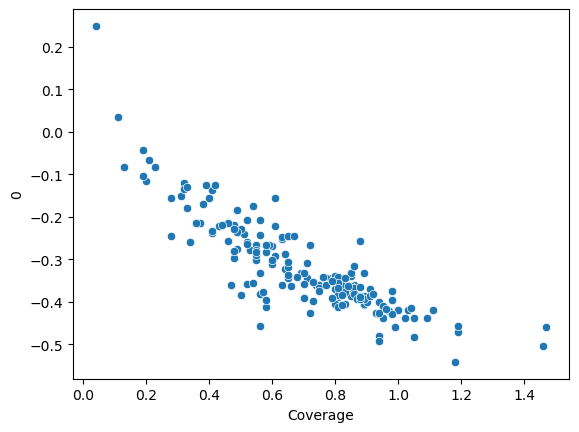

In [18]:
sns.scatterplot(data = test, x = "Coverage", y = 0)

In [22]:
test[test["Coverage"] > 0.55][test["Coverage"] < 0.61].sort_values(0)

/tmp/ipykernel_1896752/1079472562.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test[test["Coverage"] > 0.55][test["Coverage"] < 0.61].sort_values(0)


,Sample_ID,FISH_N,Strain,Source,Water,NY Native?,Notes,Batch,Coverage,filename,0
139,NC_D,NaN,NaN,North Carolina,NaN,NaN,NaN,2,0.56,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.456590
140,NC_E,NaN,NaN,North Carolina,NaN,NaN,NaN,2,0.58,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.411188
162,RPR_12,NaN,NaN,Tennessee,NaN,NaN,NaN,2,0.58,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.395441
136,NC_A,NaN,NaN,North Carolina,NaN,NaN,NaN,2,0.56,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.382098
181,W005,NaN,NaN,Wilmurt,NaN,NaN,NaN,2,0.57,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.377440
86,LML22_37,NaN,Unknown,Little Moose,Little Moose,Unknown,NaN,1,0.56,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.332624
112,Dom_22,NaN,Domestic,Domestic,Hatchery,NaN,NaN,2,0.6,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.310485
151,29012_22,NaN,NaN,Site 29012,NaN,NaN,NaN,2,0.6,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.300305
152,29012_23,NaN,NaN,Site 29012,NaN,NaN,NaN,2,0.58,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.282215
114,Dom_29,NaN,Domestic,Domestic,Hatchery,NaN,NaN,2,0.59,/storage/home/nsl5160/scratch/brook_trout/mapp...,-0.271803


In [85]:
D

array([[0.00517606, 0.40494856],
       [0.10068692, 0.30738899],
       [0.20540354, 0.00811785],
       ...,
       [0.07023853, 0.27325544],
       [0.18621331, 0.31207505],
       [0.03279628, 0.26149747]])

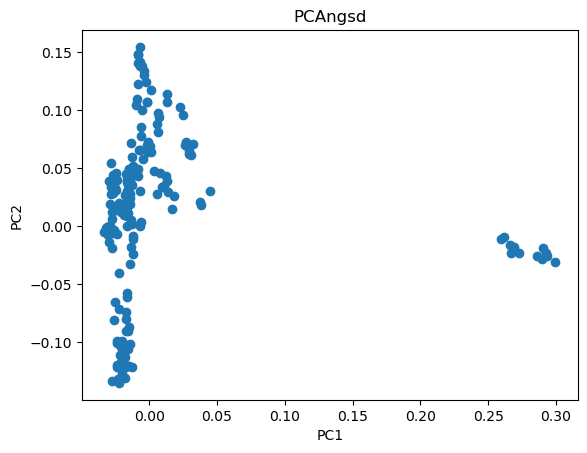

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
C = np.loadtxt("pcangsd.cov") # Reads estimated covariance matrix
D = np.load("pcangsd.selection.npy") # Reads PC based selection statistics

# Plot PCA plot
evals, evecs = np.linalg.eigh(C)
evecs = evecs[:,::-1]
plt.scatter(evecs[:,0], evecs[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCAngsd")
plt.show()

# Obtain p-values from PC-based selection scan
p = chi2.sf(D, 1)

In [113]:
meta["PC1"] = evecs[:,0]
meta["PC2"] = evecs[:,1]

<Axes: xlabel='PC1', ylabel='PC2'>

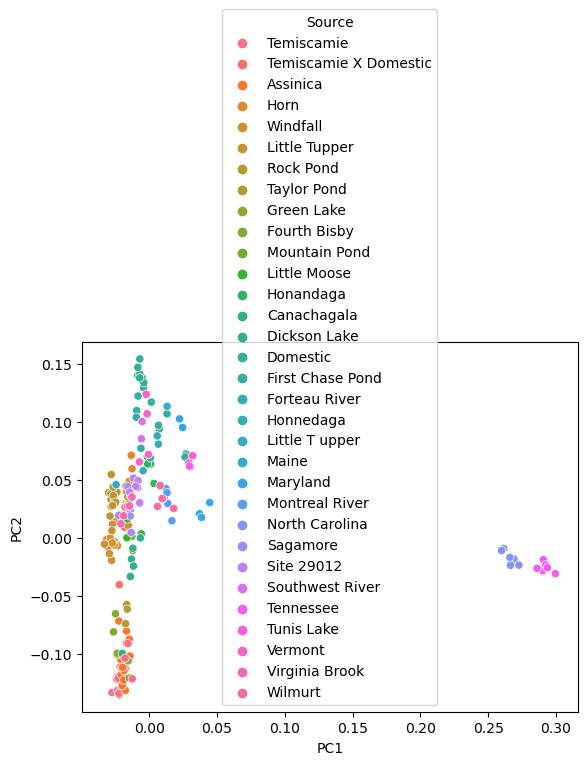

In [114]:
sns.scatterplot(data = meta, x = "PC1", y = "PC2", hue = "Source")

In [115]:
p = pd.DataFrame(p)

In [135]:
keep = pd.read_csv("pcangsd.sites", header = None)

In [136]:
pos = pd.read_csv("/storage/home/nsl5160/scratch/all_samples.pos.gz", compression = "gzip", sep = "\t")

In [30]:
!zcat /storage/home/nsl5160/scratch/all_samples.pos.gz | head

chr	pos	totDepth
NC_074665.1	76547	1155
NC_074665.1	76550	1200
NC_074665.1	76558	1312
NC_074665.1	76567	1344
NC_074665.1	76571	1367
NC_074665.1	76574	1337
NC_074665.1	76580	1384
NC_074665.1	76583	1408
NC_074665.1	76592	1409

gzip: stdout: Broken pipe


In [137]:
pos = pd.concat([pos, keep], axis = 1)

In [142]:
pos = pos[pos[0] == 1].reset_index(drop=True)

In [143]:
p = pd.concat([p, pos], axis = 1)

In [145]:
p[1] = -np.log(p[1])

In [157]:
p.sort_values(1).tail(60)

,0,1,chr,pos,totDepth,0
104034,0.229372,10.233149,NC_074680.1,44340256,349,1
223648,0.298917,10.239593,NC_074706.1,25617955,318,1
8966,0.124438,10.308710,NC_074665.1,95510387,364,1
119120,0.545452,10.323827,NC_074686.1,5745054,403,1
8953,0.141043,10.339743,NC_074665.1,95509862,468,1
84178,0.086611,10.345687,NC_074674.1,39163444,535,1
8971,0.201991,10.349949,NC_074665.1,95510718,383,1
169500,0.334554,10.390762,NC_074701.1,5790196,319,1
172237,0.289807,10.424688,NC_074701.1,33912956,253,1
179135,0.038590,10.426477,NC_074702.1,8760481,474,1


<Axes: xlabel='pos', ylabel='1'>

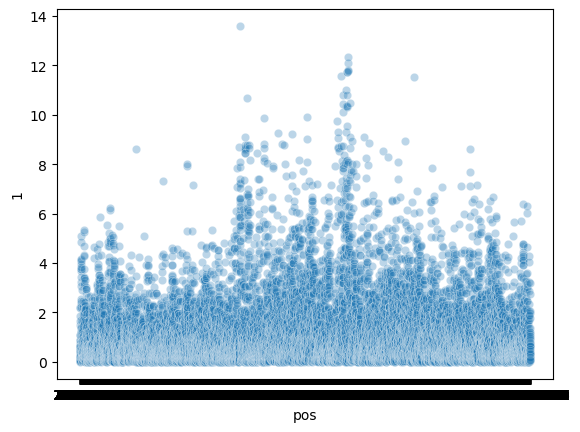

In [158]:
sns.scatterplot(p[p["chr"] == "NC_074665.1"], x = "pos", y = 1, alpha = 0.3)

<Axes: xlabel='pos', ylabel='1'>

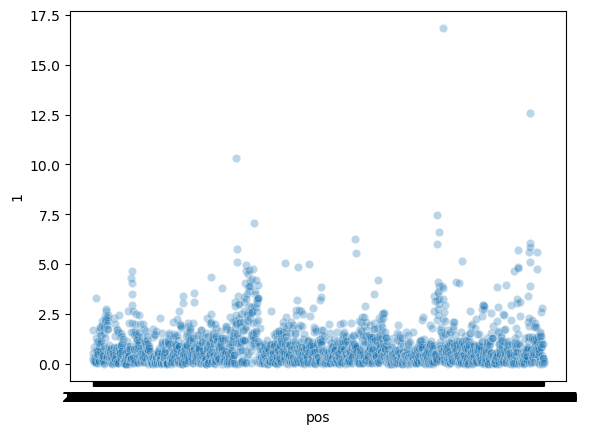

In [159]:
sns.scatterplot(p[p["chr"] == "NC_074674.1"], x = "pos", y = 1, alpha = 0.3)

In [147]:
for i in p.chr.unique():
    plt.figure()
    sns.scatterplot(p[p["chr"] == i], x = "pos", y = 1)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x1510e90b1b40> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1510e64b6290> (for post_execute):



KeyboardInterrupt



In [151]:
p

,0,1,chr,pos,totDepth,0
0,8.927449e-01,0.901328,NC_074665.1,76547,1155,1
1,6.932250e-01,0.885779,NC_074665.1,76550,1200,1
2,6.167246e-01,0.147676,NC_074665.1,76558,1312,1
3,8.388373e-01,0.382447,NC_074665.1,76574,1337,1
4,8.191220e-01,0.142469,NC_074665.1,76580,1384,1
...,...,...,...,...,...,...
223722,3.036020e-01,2.437474,NC_074706.1,25698339,271,1
223723,2.945724e-01,2.217669,NC_074706.1,25698405,289,1
223724,3.177874e-08,0.703905,NC_074706.1,25701200,244,1
223725,6.046934e-01,3.174202,NC_074706.1,25701579,269,1


In [130]:
!cat ../sfs_input.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_input

source ~/.bashrc
conda activate angsd

BAMLIST=$1
OUTDIR=$2
OUTPREFIX=$3
NONREPEAT=$4
REGIONS=$5
REF=$6

cd $SLURM_SUBMIT_DIR
mkdir -p ${OUTDIR}

angsd -bam ${BAMLIST} \
    -anc ${REF} -doGlf 3 \
    -GL 2 -dosaf 1 -nThreads ${SLURM_NTASKS} \
    -uniqueOnly 1 -remove_bads 1 \
    -minMapQ 20 -minQ 20 -doMajorMinor 1 -doMaf 1 \
    -r ${REGIONS} -sites ${NONREPEAT} \
    -out ${OUTDIR}/${OUTPREFIX}


PSMC using ngsPSMC on a few individuals with the highest coverage from each general region:

In [28]:
psmc = meta.sort_values(["Source", "Coverage"]).drop_duplicates("Source", keep = "last").reset_index(drop=True)

In [45]:
for i in range(len(psmc)):
    task = "ngspsmc"
    mem = "64"
    cpus = "12"
    bam = psmc["filename"][i]
    outdir = "/storage/home/nsl5160/scratch/brook_trout/psmc"
    prefix = psmc["Sample_ID"][i]
    sites = "../references/no_repeats_regions_list.txt"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bam + " " + outdir + " " + prefix + " " + sites], shell=True)

Submitted batch job 31322675
Submitted batch job 31322676
Submitted batch job 31322677
Submitted batch job 31322678
Submitted batch job 31322679
Submitted batch job 31322680
Submitted batch job 31322681
Submitted batch job 31322683
Submitted batch job 31322684
Submitted batch job 31322685
Submitted batch job 31322686
Submitted batch job 31322687
Submitted batch job 31322688
Submitted batch job 31322689
Submitted batch job 31322690
Submitted batch job 31322691
Submitted batch job 31322692
Submitted batch job 31322693
Submitted batch job 31322694
Submitted batch job 31322695
Submitted batch job 31322696
Submitted batch job 31322697
Submitted batch job 31322698
Submitted batch job 31322699
Submitted batch job 31322700
Submitted batch job 31322701
Submitted batch job 31322702
Submitted batch job 31322703
Submitted batch job 31322704
Submitted batch job 31322705
Submitted batch job 31322706
Submitted batch job 31322707


In [57]:
!cat ./slurm-31322675.out

	-> angsd version: 0.940-dirty (htslib: 1.17) build(May 18 2023 16:53:32)
	-> angsd -i /storage/home/nsl5160/scratch/brook_trout/mapped/Assinica_7.markdup.bam -dopsmc 1 -out /storage/home/nsl5160/scratch/brook_trout/psmc/Assinica_7 -gl 1 -minq 20 -minmapq 30 -nThreads 12 -sites ../references/no_repeats_regions_list.txt 
	-> Inputtype is BAM/CRAM
[multiReader] 1 samples in 1 input files
	-> You have choosen to supply a very high number of threads. The number of threads will be capped at 8
	-> [prep_sites.cpp] Reading binary representation of '../references/no_repeats_regions_list.txt'
	-> [prep_sites.cpp] nChr: 2546 loaded from binary filter file
	-> [abcFilter.cpp] -sites is still beta, use at own risk...
	-> Parsing 1 number of samples 
	-> Printing at chr: NC_074665.1 pos:1515325 chunknumber 100 contains 2790 sites
	-> Printing at chr: NC_074665.1 pos:2991560 chunknumber 200 contains 4486 sites
	-> Printing at chr: NC_074665.1 pos:4240824 chunknumber 300 contains 3255 sites
	-> Print

	-> Printing at chr: NC_074684.1 pos:7151237 chunknumber 141200 contains 4296 sites
	-> Printing at chr: NC_074684.1 pos:7967755 chunknumber 141300 contains 4577 sites
	-> Printing at chr: NC_074684.1 pos:8787170 chunknumber 141400 contains 4415 sites
	-> Printing at chr: NC_074684.1 pos:9655711 chunknumber 141500 contains 5004 sites
	-> Printing at chr: NC_074684.1 pos:10477208 chunknumber 141600 contains 4438 sites
	-> Printing at chr: NC_074684.1 pos:11421133 chunknumber 141700 contains 4122 sites
	-> Printing at chr: NC_074684.1 pos:12250854 chunknumber 141800 contains 4595 sites
	-> Printing at chr: NC_074684.1 pos:13060065 chunknumber 141900 contains 5326 sites
	-> Printing at chr: NC_074684.1 pos:13853096 chunknumber 142000 contains 5495 sites
	-> Printing at chr: NC_074684.1 pos:14688771 chunknumber 142100 contains 4347 sites
	-> Printing at chr: NC_074684.1 pos:15544458 chunknumber 142200 contains 4530 sites
	-> Printing at chr: NC_074684.1 pos:16337571 chunknumber 142300 cont

After this, we are going to infer inbreeding rates per hatchery strains

In [19]:
for strain in ["wild", "hatchery"]:
    for i in bed[0][bed[0].str.contains("NC")].tolist():
        task = "sfs_input"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/saf"
        outprefix = strain.replace(" ", "_") + "_" + i + "8samps"
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list.txt"
        ref = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             sitesfile + " " + regions + " " + ref], shell=True)

Submitted batch job 30729858
Submitted batch job 30729859
Submitted batch job 30729860
Submitted batch job 30729861
Submitted batch job 30729862
Submitted batch job 30729863
Submitted batch job 30729864
Submitted batch job 30729865
Submitted batch job 30729867
Submitted batch job 30729869
Submitted batch job 30729871
Submitted batch job 30729873
Submitted batch job 30729875
Submitted batch job 30729876
Submitted batch job 30729877
Submitted batch job 30729878
Submitted batch job 30729879
Submitted batch job 30729881
Submitted batch job 30729882
Submitted batch job 30729883
Submitted batch job 30729884
Submitted batch job 30729885
Submitted batch job 30729886
Submitted batch job 30729887
Submitted batch job 30729888
Submitted batch job 30729889
Submitted batch job 30729890
Submitted batch job 30729891
Submitted batch job 30729892
Submitted batch job 30729893
Submitted batch job 30729894
Submitted batch job 30729895
Submitted batch job 30729896
Submitted batch job 30729897
Submitted batc

In [82]:
for strain in strains[0:2]:
    for i in bed[0][bed[0].str.contains("NC")].tolist():
        task = "sfs_input"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/saf"
        outprefix = strain.replace(" ", "_") + "_" + i
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ref = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             sitesfile + " " + regions + " " + ref], shell=True)

Submitted batch job 31353050
Submitted batch job 31353051
Submitted batch job 31353052
Submitted batch job 31353053
Submitted batch job 31353054
Submitted batch job 31353055
Submitted batch job 31353056
Submitted batch job 31353057
Submitted batch job 31353058
Submitted batch job 31353059
Submitted batch job 31353060
Submitted batch job 31353061
Submitted batch job 31353062
Submitted batch job 31353063
Submitted batch job 31353064
Submitted batch job 31353065
Submitted batch job 31353066
Submitted batch job 31353067
Submitted batch job 31353068
Submitted batch job 31353069
Submitted batch job 31353070
Submitted batch job 31353071
Submitted batch job 31353072
Submitted batch job 31353073
Submitted batch job 31353074
Submitted batch job 31353075
Submitted batch job 31353076
Submitted batch job 31353077
Submitted batch job 31353078
Submitted batch job 31353079
Submitted batch job 31353080
Submitted batch job 31353081
Submitted batch job 31353082
Submitted batch job 31353083
Submitted batc

In [83]:
while int(subprocess.run(['squeue -u nsl5160 | grep "fst" | wc -l'], 
                   shell = True, 
                   stdout=subprocess.PIPE).
    stdout.decode('utf-8').replace("\n", "")) > 10:
    time.sleep(2)

In [84]:
for strain in strains[2:4]:
    for i in bed[0][bed[0].str.contains("NC")].tolist():
        task = "sfs_input"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/saf"
        outprefix = strain.replace(" ", "_") + "_" + i
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ref = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             sitesfile + " " + regions + " " + ref], shell=True)

Submitted batch job 31354687
Submitted batch job 31354688
Submitted batch job 31354689
Submitted batch job 31354690
Submitted batch job 31354691
Submitted batch job 31354692
Submitted batch job 31354693
Submitted batch job 31354694
Submitted batch job 31354695
Submitted batch job 31354696
Submitted batch job 31354697
Submitted batch job 31354698
Submitted batch job 31354700
Submitted batch job 31354701
Submitted batch job 31354702
Submitted batch job 31354703
Submitted batch job 31354704
Submitted batch job 31354705
Submitted batch job 31354706
Submitted batch job 31354707
Submitted batch job 31354708
Submitted batch job 31354709
Submitted batch job 31354710
Submitted batch job 31354711
Submitted batch job 31354712
Submitted batch job 31354713
Submitted batch job 31354714
Submitted batch job 31354715
Submitted batch job 31354716
Submitted batch job 31354717
Submitted batch job 31354718
Submitted batch job 31354719
Submitted batch job 31354720
Submitted batch job 31354721
Submitted batc

In [85]:
while int(subprocess.run(['squeue -u nsl5160 | grep "fst" | wc -l'], 
                   shell = True, 
                   stdout=subprocess.PIPE).
    stdout.decode('utf-8').replace("\n", "")) > 10:
    time.sleep(2)

In [86]:
for strain in strains[4:]:
    for i in bed[0][bed[0].str.contains("NC")].tolist():
        task = "sfs_input"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/saf"
        outprefix = strain.replace(" ", "_") + "_" + i
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ref = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             sitesfile + " " + regions + " " + ref], shell=True)

Submitted batch job 31356375
Submitted batch job 31356376
Submitted batch job 31356377
Submitted batch job 31356378
Submitted batch job 31356379
Submitted batch job 31356380
Submitted batch job 31356381
Submitted batch job 31356382
Submitted batch job 31356383
Submitted batch job 31356384
Submitted batch job 31356385
Submitted batch job 31356386
Submitted batch job 31356387
Submitted batch job 31356388
Submitted batch job 31356389
Submitted batch job 31356390
Submitted batch job 31356391
Submitted batch job 31356392
Submitted batch job 31356393
Submitted batch job 31356394
Submitted batch job 31356395
Submitted batch job 31356396
Submitted batch job 31356397
Submitted batch job 31356398
Submitted batch job 31356399
Submitted batch job 31356400
Submitted batch job 31356401
Submitted batch job 31356402
Submitted batch job 31356403
Submitted batch job 31356404
Submitted batch job 31356405
Submitted batch job 31356406
Submitted batch job 31356407
Submitted batch job 31356408
Submitted batc

In [87]:
while int(subprocess.run(['squeue -u nsl5160 | grep "fst" | wc -l'], 
                   shell = True, 
                   stdout=subprocess.PIPE).
    stdout.decode('utf-8').replace("\n", "")) > 10:
    time.sleep(2)

In [88]:
for strain in ["appalachian"]:
    for i in bed[0][bed[0].str.contains("NC")].tolist():
        task = "sfs_input"
        mem = "64"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/saf"
        outprefix = strain.replace(" ", "_") + "_" + i
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ref = "../references/sfon.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             sitesfile + " " + regions + " " + ref], shell=True)

Submitted batch job 31358176
Submitted batch job 31358177
Submitted batch job 31358178
Submitted batch job 31358179
Submitted batch job 31358180
Submitted batch job 31358181
Submitted batch job 31358182
Submitted batch job 31358183
Submitted batch job 31358184
Submitted batch job 31358185
Submitted batch job 31358186
Submitted batch job 31358187
Submitted batch job 31358188
Submitted batch job 31358189
Submitted batch job 31358190
Submitted batch job 31358191
Submitted batch job 31358192
Submitted batch job 31358193
Submitted batch job 31358194
Submitted batch job 31358195
Submitted batch job 31358196
Submitted batch job 31358197
Submitted batch job 31358198
Submitted batch job 31358199
Submitted batch job 31358200
Submitted batch job 31358201
Submitted batch job 31358202
Submitted batch job 31358203
Submitted batch job 31358204
Submitted batch job 31358205
Submitted batch job 31358206
Submitted batch job 31358207
Submitted batch job 31358208
Submitted batch job 31358209
Submitted batc

In [90]:
%%bash
source ~/.bashrc
conda activate angsd
cd /storage/home/nsl5160/scratch/brook_trout/saf
for STRAIN in Domestic Temiscamie Assinica Horn Little_Tupper Windfall appalachian; do
    realSFS cat ${STRAIN}_*.saf.idx \
        -outnames ${STRAIN} -P 8
done

	-> This will cat together .saf files from angsd
	-> regions has to be disjoint between saf files. This WONT be checked (alot) !
	-> This has only been tested on safs for different chrs !
	 Examples:
		 'realSFS cat chr1.saf.idx chr2.saf.idx -outnames merged -P 10'
		 'realSFS cat -b file.list -outnames merged -P 10'
		 Possible options: -b file.list -P nThreads 
	-> outnames: 'Domestic' number of safs:42 nThreads: 8
	-> Number of threads: 8
	-> Setting threads to: 8 for both .saf.gz and saf.pos.gz
	-> Merging 0/42 
	-> Merging 1/42 
	-> Merging 2/42 
	-> Merging 3/42 
	-> Merging 4/42 
	-> Merging 5/42 
	-> Merging 6/42 
	-> Merging 7/42 
	-> Merging 8/42 
	-> Merging 9/42 
	-> Merging 10/42 
	-> Merging 11/42 
	-> Merging 12/42 
	-> Merging 13/42 
	-> Merging 14/42 
	-> Merging 15/42 
	-> Merging 16/42 
	-> Merging 17/42 
	-> Merging 18/42 
	-> Merging 19/42 
	-> Merging 20/42 
	-> Merging 21/42 
	-> Merging 22/42 
	-> Merging 23/42 
	-> Merging 24/42 
	-> Merging 25/42 
	-> Merging 

	-> Setting threads to: 8 for both .saf.gz and saf.pos.gz
	-> Merging 0/42 
	-> Merging 1/42 
	-> Merging 2/42 
	-> Merging 3/42 
	-> Merging 4/42 
	-> Merging 5/42 
	-> Merging 6/42 
	-> Merging 7/42 
	-> Merging 8/42 
	-> Merging 9/42 
	-> Merging 10/42 
	-> Merging 11/42 
	-> Merging 12/42 
	-> Merging 13/42 
	-> Merging 14/42 
	-> Merging 15/42 
	-> Merging 16/42 
	-> Merging 17/42 
	-> Merging 18/42 
	-> Merging 19/42 
	-> Merging 20/42 
	-> Merging 21/42 
	-> Merging 22/42 
	-> Merging 23/42 
	-> Merging 24/42 
	-> Merging 25/42 
	-> Merging 26/42 
	-> Merging 27/42 
	-> Merging 28/42 
	-> Merging 29/42 
	-> Merging 30/42 
	-> Merging 31/42 
	-> Merging 32/42 
	-> Merging 33/42 
	-> Merging 34/42 
	-> Merging 35/42 
	-> Merging 36/42 
	-> Merging 37/42 
	-> Merging 38/42 
	-> Merging 39/42 
	-> Merging 40/42 
	-> Merging 41/42 


In [19]:
%%bash
source ~/.bashrc
conda activate angsd
cd /storage/home/nsl5160/scratch/brook_trout/fst_scans/
for STRAIN in wild hatchery; do
    realSFS cat ${STRAIN}_*8samps.saf.idx \
        -outnames ${STRAIN}_8sampsper -P 30
done

	-> This will cat together .saf files from angsd
	-> regions has to be disjoint between saf files. This WONT be checked (alot) !
	-> This has only been tested on safs for different chrs !
	 Examples:
		 'realSFS cat chr1.saf.idx chr2.saf.idx -outnames merged -P 10'
		 'realSFS cat -b file.list -outnames merged -P 10'
		 Possible options: -b file.list -P nThreads 
	-> outnames: 'wild_8sampsper' number of safs:42 nThreads: 30
	-> Number of threads: 30
	-> Setting threads to: 30 for both .saf.gz and saf.pos.gz
	-> Merging 0/42 
	-> Merging 1/42 
	-> Merging 2/42 
	-> Merging 3/42 
	-> Merging 4/42 
	-> Merging 5/42 
	-> Merging 6/42 
	-> Merging 7/42 
	-> Merging 8/42 
	-> Merging 9/42 
	-> Merging 10/42 
	-> Merging 11/42 
	-> Merging 12/42 
	-> Merging 13/42 
	-> Merging 14/42 
	-> Merging 15/42 
	-> Merging 16/42 
	-> Merging 17/42 
	-> Merging 18/42 
	-> Merging 19/42 
	-> Merging 20/42 
	-> Merging 21/42 
	-> Merging 22/42 
	-> Merging 23/42 
	-> Merging 24/42 
	-> Merging 25/42 
	->

In [89]:
%%bash
source ~/.bashrc
conda activate angsd
cd /storage/home/nsl5160/scratch/brook_trout/fst_scans/
for STRAIN in wild hatchery; do
    realSFS cat ${STRAIN}_*.saf.idx \
        -outnames ${STRAIN} -P 8
done

	-> This will cat together .saf files from angsd
	-> regions has to be disjoint between saf files. This WONT be checked (alot) !
	-> This has only been tested on safs for different chrs !
	 Examples:
		 'realSFS cat chr1.saf.idx chr2.saf.idx -outnames merged -P 10'
		 'realSFS cat -b file.list -outnames merged -P 10'
		 Possible options: -b file.list -P nThreads 
	-> outnames: 'wild' number of safs:42 nThreads: 8
	-> Number of threads: 8
	-> Setting threads to: 8 for both .saf.gz and saf.pos.gz
	-> Merging 0/42 
	-> Merging 1/42 
	-> Merging 2/42 
	-> Merging 3/42 
	-> Merging 4/42 
	-> Merging 5/42 
	-> Merging 6/42 
	-> Merging 7/42 
	-> Merging 8/42 
	-> Merging 9/42 
	-> Merging 10/42 
	-> Merging 11/42 
	-> Merging 12/42 
	-> Merging 13/42 
	-> Merging 14/42 
	-> Merging 15/42 
	-> Merging 16/42 
	-> Merging 17/42 
	-> Merging 18/42 
	-> Merging 19/42 
	-> Merging 20/42 
	-> Merging 21/42 
	-> Merging 22/42 
	-> Merging 23/42 
	-> Merging 24/42 
	-> Merging 25/42 
	-> Merging 26/4

In [58]:
%%bash
cd /storage/home/nsl5160/scratch/brook_trout/saf/
for STRAIN in Domestic Temiscamie Assinica Horn Little_Tupper Windfall appalachian; do
    zcat ${STRAIN}_NC_*.glf.gz > ~/scratch/${STRAIN}.glf
    cat ${STRAIN}_NC_*.pos.gz > ${STRAIN}.pos.gz
done

Process is interrupted.


In [86]:
!ls -lh /storage/home/nsl5160/scratch/brook_trout/inbreeding/

total 330M
-rw-rw-r-- 1 nsl5160 nsl5160_collab 330M Jan  5 22:06 Domestic.inbreed.pars


In [87]:
!cat ./slurm-31448057.out

==> Input Arguments:
	glf file: /storage/home/nsl5160/scratch/brook_trout/saf/Domestic.glf
	init_values: r
	calc_LRT: false
	freq_fixed: false
	out file: /storage/home/nsl5160/scratch/brook_trout/inbreeding/Domestic.inbreed
	n_ind: 15
	n_sites: 43129336
	chunk_size: 100000
	approx_EM: false
	call_geno: false
	max_iters: 1500
	min_iters: 10
	min_epsilon: 0.0000000010
	n_threads: 20
	seed: 1736130443
	quick: false
	verbose: 1
	version: 1.2.0-STD (Dec 28 2024 @ 20:42:10)

==> UNCOMP input file (".glf"): number of sites (43129336) match expected file size
==> Analysis will be run in 432 chunk(s)
==> Using native I/O library
==> Setting initial values
==> Initial LogLkl: -89661244.595321282744408

Iteration 1:
	LogLkl: -56590485.469789430499077	 epsilon: 0.368841178535877 0.000013777198837	time: 294 (s)

Iteration 2:
	LogLkl: -39392917.619248881936073	 epsilon: 0.303895040089758 0.000008199670314	time: 287 (s)

Iteration 3:
	LogLkl: -29150118.562645547091961	 epsilon: 0.260016258648441 0.00

In [60]:
!zcat /storage/home/nsl5160/scratch/brook_trout/saf/Domestic_NC_074665.1.glf.gz \
    > /storage/home/nsl5160/scratch/brook_trout/saf/Domestic.glf

In [75]:
!cp /storage/home/nsl5160/scratch/brook_trout/saf/Domestic_NC_074665.1.glf.pos.gz \
    /storage/home/nsl5160/scratch/brook_trout/saf/Domestic.pos.gz

In [77]:
for strain in ["Domestic"]:
    task = "ngsF"
    mem = "500"
    cpus = "20"
    ingls = "/storage/home/nsl5160/scratch/brook_trout/saf/" + strain.replace(" ", "_") + ".glf"
    inpos = "/storage/home/nsl5160/scratch/brook_trout/saf/" + strain.replace(" ", "_") + ".pos.gz"
    bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/inbreeding"
    outprefix = strain.replace(" ", "_")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         ingls + " " + inpos + " " + bamlist + " " + outpath + " " + outprefix ], shell=True)

Submitted batch job 31448057


In [59]:
for strain in strains + ["appalachian"]:
    task = "ngsF"
    mem = "500"
    cpus = "20"
    ingls = "/storage/home/nsl5160/scratch/brook_trout/saf/" + strain.replace(" ", "_") + ".glf"
    inpos = "/storage/home/nsl5160/scratch/brook_trout/saf/" + strain.replace(" ", "_") + ".pos.gz"
    bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/inbreeding"
    outprefix = strain.replace(" ", "_")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         ingls + " " + inpos + " " + bamlist + " " + outpath + " " + outprefix ], shell=True)

Submitted batch job 31447935
Submitted batch job 31447936
Submitted batch job 31447937
Submitted batch job 31447938
Submitted batch job 31447939
Submitted batch job 31447940



KeyboardInterrupt



In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --account=open
#SBATCH --time=48:00:00
#SBATCH --job-name=ngsF

source ~/.bashrc
conda activate base
INGLS=$1
INPOS=$2
INBAMLIST=$3
OUTPATH=$4
OUTPREFIX=$5

export CPATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/include
export LD_LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/:$LD_LIBRARY_PATH
export LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib
export PKG_CONFIG_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/pkgconfig

NSITES=$( zcat ${INPOS} | tail -n+1 | wc -l )
NINDS=$( wc -l ${INBAMLIST} )

/storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/ngsF/ngsF \
    --n_threads ${SLURM_NTASKS} \
    --n_ind ${NINDS} \
    --n_sites ${NSITES} \
    --glf ${INGLS} \
    --init_values r --min_epsilon 1e-9 \
    --out ${OUTPATH}/${OUTPREFIX}.inbreed

In [19]:
!cat ../sfs_input.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_input

source ~/.bashrc
conda activate angsd

BAMLIST=$1
OUTDIR=$2
OUTPREFIX=$3
NONREPEAT=$4
REGIONS=$5
REF=$6

cd $SLURM_SUBMIT_DIR
mkdir -p ${OUTDIR}

angsd -bam ${BAMLIST} \
    -anc ${REF} -doGlf 3 \
    -GL 2 -dosaf 1 -nThreads ${SLURM_NTASKS} \
    -uniqueOnly 1 -remove_bads 1 \
    -minMapQ 20 -minQ 20 -doMajorMinor 1 -doMaf 1 \
    -r ${REGIONS} -sites ${NONREPEAT} \
    -out ${OUTDIR}/${OUTPREFIX}


StairwayPlot from 1D SFS files:

In [113]:
for strain in strains + ["appalachian"]:
    task = "sfs_calc_1pop"
    mem = "500"
    cpus = "8"
    indir = "/storage/home/nsl5160/scratch/brook_trout/saf/"
    strain1 = strain.replace(" ", "_")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 ], shell=True)

Submitted batch job 31360777
Submitted batch job 31360778
Submitted batch job 31360779
Submitted batch job 31360780
Submitted batch job 31360781
Submitted batch job 31360782
Submitted batch job 31360783


In [121]:
!cat ../references/sfon_norepeats.bed | grep "^NC" | awk -F'\t' 'BEGIN{SUM=0}{ SUM+=$3-$2 }END{print SUM}'

1033833873


In [158]:
%%bash
source ~/.bashrc
conda activate easySFS
ORIGIN=$( pwd )
for i in Assinica Little_Tupper Temiscamie Windfall Domestic Horn appalachian; do
    SFS=$( cat /storage/home/nsl5160/scratch/brook_trout/saf/${i}.folded.ml | cut -d" " -f2- | tr " " "\n" | grep -v "^0" | tr "\n" "\t" | cut -f1-23 )
    NHAP=$( cat ../${i}.bamlist | wc -l )
    NSEQ=$(( NHAP * 2 ))
    RAND=$( echo -e "$(( ( ${NSEQ} - 2 ) / 4 )) $(( ( ${NSEQ} - 2 ) / 2 )) $(( (( ${NSEQ} - 2 ) * 3 ) / 4 )) $(( ( ${NSEQ} - 2 ) ))")
    PROJDIR="/storage/home/nsl5160/scratch/brook_trout/stairway/${i}_10e9"
    mkdir -p ${PROJDIR}
    sed "s/TMPNAME/${i}_10e9/g" ../st.blueprint \
        | sed "s/TMPSFS/${SFS}/g" | sed "s/NSEQ/${NSEQ}/g" \
        | sed "s/RAND/${RAND}/g" | sed "s:PROJDIR:${PROJDIR}:g" \
        > ${PROJDIR}/${i}_10e9.blueprint
    cd ${PROJDIR}
    java -cp /storage/group/ibb3/default/apal_reference_panel/stairway_plot_v2.1.1/stairway_plot_es Stairbuilder \
        ${i}_10e9.blueprint
    cd ${ORIGIN}
done

File: Assinica_10e9.blueprint.sh created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/input/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/ created
File: Little_Tupper_10e9.blueprint.sh created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/input/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/ created
Directory: /storage/home/nsl5160/scratch/brook_trout/stairway/Little_

In [168]:
%%bash
source ~/.bashrc
conda activate easySFS
for i in Assinica Little_Tupper Temiscamie Windfall Domestic Horn appalachian; do
    cd /storage/home/nsl5160/scratch/brook_trout/stairway/${i}_10e9
    echo -e "#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --ntasks=8
#SBATCH --mem=32GB
#SBATCH --job-name=swplot

source ~/.bashrc
conda activate easySFS
cd /storage/home/nsl5160/scratch/brook_trout/stairway
" > ${i}_10e9.blueprint.sbatch.sh
    cat ${i}_10e9.blueprint.sh >> ${i}_10e9.blueprint.sbatch.sh
done

In [169]:
%%bash
source ~/.bashrc
conda activate easySFS
for i in Assinica Little_Tupper Temiscamie Windfall Domestic Horn appalachian; do
    cd /storage/home/nsl5160/scratch/brook_trout/stairway/${i}_10e9
    sbatch ${i}_10e9.blueprint.sbatch.sh
done

Submitted batch job 31364748
Submitted batch job 31364749
Submitted batch job 31364750
Submitted batch job 31364751
Submitted batch job 31364752
Submitted batch job 31364753
Submitted batch job 31364754


In [239]:
ofav = pd.read_csv("/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/Horn_10e9.final.summary", sep = "\t")
#ofra = pd.read_csv("../stairway/ofra_saf/ofra_saf.final.summary", sep = "\t")
ofav["Species"] = "Orbicella faveolata"
#ofra["Species"] = "Orbicella annularis"

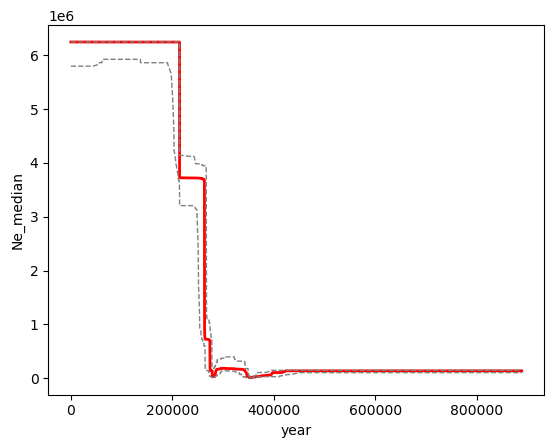

In [245]:
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_median", 
                        errorbar=None, color = "red", lw = 2)
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_2.5%", 
                        errorbar=None, color = "grey", lw = 1, linestyle = "--")
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_97.5%", 
                        errorbar=None, color = "grey", lw = 1, linestyle = "--")

In [8]:
ofav = pd.read_csv("/storage/home/nsl5160/scratch/brook_trout/stairway/_10e9/Little_Tupper_10e9.final.summary", sep = "\t")
#ofra = pd.read_csv("../stairway/ofra_saf/ofra_saf.final.summary", sep = "\t")
ofav["Species"] = "Orbicella faveolata"
#ofra["Species"] = "Orbicella annularis"

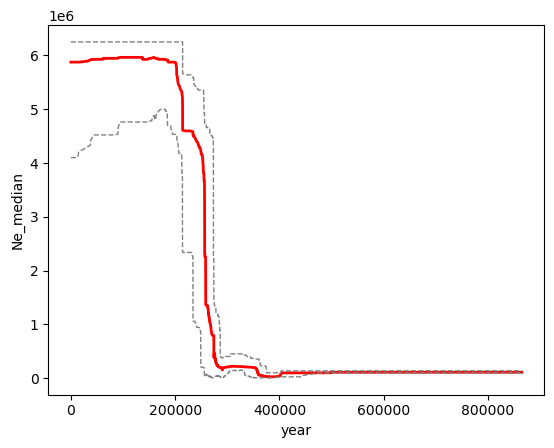

In [9]:
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_median", 
                        errorbar=None, color = "red", lw = 2)
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_2.5%", 
                        errorbar=None, color = "grey", lw = 1, linestyle = "--")
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_97.5%", 
                        errorbar=None, color = "grey", lw = 1, linestyle = "--")

In [ ]:
orbicella = pd.concat([ofav, ofra]).reset_index(drop=True)

In [ ]:
plt.rcParams['figure.figsize'] = 10, 9

In [ ]:
from IPython.display import Markdown, display

In [ ]:
colors = ["#058ED9", "#2D3142", "#5cd3e9", "#f7b2b2"]

In [ ]:
display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in colors
)))

In [ ]:
fig, axs = plt.subplots(nrows=3, sharex=True, sharey = True)

#ax = fig.add_subplot(111)

stairway = sns.lineplot(data = oann, x = "year", y = "Ne_median", 
                        errorbar=None, ax = axs[0], color = colors[2], lw = 2)
stairway = sns.lineplot(data = oann, x = "year", y = "Ne_2.5%", 
                        errorbar=None, ax = axs[0], color = "grey", lw = 1, linestyle = "--")
stairway = sns.lineplot(data = oann, x = "year", y = "Ne_97.5%", 
                        errorbar=None, ax = axs[0], color = "grey", lw = 1, linestyle = "--")

stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_median", 
                        errorbar=None, ax = axs[1], color = colors[0], lw = 2)
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_2.5%", 
                        errorbar=None, ax = axs[1], color = "grey", lw = 1, linestyle = "--")
stairway = sns.lineplot(data = ofav, x = "year", y = "Ne_97.5%", 
                        errorbar=None, ax = axs[1], color = "grey", lw = 1, linestyle = "--")

stairway = sns.lineplot(data = ofra, x = "year", y = "Ne_median", 
                        errorbar=None, ax = axs[2], color = colors[1], lw = 2)
stairway = sns.lineplot(data = ofra, x = "year", y = "Ne_2.5%", 
                        errorbar=None, ax = axs[2], color = "grey", lw = 1, linestyle = "--")
stairway = sns.lineplot(data = ofra, x = "year", y = "Ne_97.5%", 
                        errorbar=None, ax = axs[2], color = "grey", lw = 1, linestyle = "--")

stairway.set(xscale="log", yscale="log")

plt.ylim(5000, np.max(orbicella["Ne_97.5%"])*1.05)
plt.xlim(10000, np.max(orbicella["year"]))
plt.subplots_adjust(0,0,1,1,0,0)
plt.savefig("../stairway.pdf", dpi = 300)

In [228]:
%%bash
source ~/.bashrc
conda activate easySFS
for i in Assinica Little_Tupper Temiscamie Windfall Domestic Horn appalachian; do
    cd /storage/home/nsl5160/scratch/brook_trout/stairway/${i}_10e9/
    java -Xmx1g -cp /storage/group/ibb3/default/apal_reference_panel/stairway_plot_v2.1.1/stairway_plot_es/ Stairpainter \
        ${i}_10e9.blueprint
    bash ${i}_10e9.blueprint.plot.sh
done

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-5.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-2.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-126.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-27.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-166.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-52.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-56.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-86.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-58.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-47.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-37.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-115.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-9.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-53.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-167.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-161.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-40.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-93.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-10.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-146.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-66.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-92.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-147.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-154.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-162.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-150.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand7/Assinica_10e9-13.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-38.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-134.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-146.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-33.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-75.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-159.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-34.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-158.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-36.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-87.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-49.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-65.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-154.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-37.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-16.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-6.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-71.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-81.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stai

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-190.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-26.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-122.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-126.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-124.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-88.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-31.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-89.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand14/Assinica_10e9-150.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-33.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-105.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-194.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-4.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-179.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-114.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-84.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-12.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-125.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-149.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-60.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-110.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-29.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-199.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-99.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-129.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-85.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand21/Assinica_10e9-5.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/s

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-135.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-109.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-157.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-151.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-195.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-118.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-26.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-23.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-162.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_tro

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-32.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-14.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-75.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-35.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-67.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-95.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-11.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-45.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-48.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stai

/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-28.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-128.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-132.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-111.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-78.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-54.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-161.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-126.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/rand28/Assinica_10e9-56.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout

144	Assinica_10e9-41.28_0.67.addTheta
145	Assinica_10e9-77.28_0.67.addTheta
146	Assinica_10e9-141.28_0.67.addTheta
147	Assinica_10e9-186.28_0.67.addTheta
148	Assinica_10e9-64.28_0.67.addTheta
149	Assinica_10e9-148.28_0.67.addTheta
150	Assinica_10e9-192.28_0.67.addTheta
151	Assinica_10e9-127.28_0.67.addTheta
152	Assinica_10e9-37.28_0.67.addTheta
153	Assinica_10e9-130.28_0.67.addTheta
154	Assinica_10e9-182.28_0.67.addTheta
155	Assinica_10e9-193.28_0.67.addTheta
156	Assinica_10e9-13.28_0.67.addTheta
157	Assinica_10e9-147.28_0.67.addTheta
158	Assinica_10e9-174.28_0.67.addTheta
159	Assinica_10e9-179.28_0.67.addTheta
160	Assinica_10e9-124.28_0.67.addTheta
161	Assinica_10e9-145.28_0.67.addTheta
162	Assinica_10e9-92.28_0.67.addTheta
163	Assinica_10e9-52.28_0.67.addTheta
164	Assinica_10e9-25.28_0.67.addTheta
165	Assinica_10e9-150.28_0.67.addTheta
166	Assinica_10e9-155.28_0.67.addTheta
167	Assinica_10e9-163.28_0.67.addTheta
168	Assinica_10e9-188.28_0.67.addTheta
169	Assinica_10e9-99.28_0.67.addT

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Assinica_10e9-5.7_0.67.addTheta
1	Assinica_10e9-2.7_0.67.addTheta
2	Assinica_10e9-126.7_0.67.addTheta
3	Assinica_10e9-27.7_0.67.addTheta
4	Assinica_10e9-166.7_0.67.addTheta
5	Assinica_10e9-52.7_0.67.addTheta
6	Assinica_10e9-56.7_0.67.addTheta
7	Assinica_10e9-86.7_0.67.addTheta
8	Assinica_10e9-58.7_0.67.addTheta
9	Assinica_10e9-48.7_0.67.addTheta
10	Assinica_10e9-170.7_0.67.addTheta
11	Assinica_10e9-81.7_0.67.addTheta
12	Assinica_10e9-120.7_0.67.addTheta
13	Assinica_10e9-90.7_0.67.addTheta
14	Assinica_10e9-21.7_0.67.addTheta
15	Assinica_10e9-131.7_0.67.addTheta
16	Assinica_10e9-183.7_0.67.addTheta
17	Assinica_10e9-181.7_0.67.addTheta
18	Assinica_10e9-172.7_0.67.addTheta
19	Assinica_10e9-33.7_0.67.addTheta
20	Assinica_10e9-176.7_0.67.addTheta
21	Assinica_10e9-11.7_0.67.addTheta
22	Assinica_10e9-41.7_0.67.addTheta
23	Assinica_10e9-171.7_0.67.addTheta
24	Assinica_10e9-94.7_0.67.addTheta
25	Assinica_10e9-39.7_0.67.addTheta
26	Assinica_10e9-173.7_0.67.addTheta
27	Assinica_10e9-156

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Assinica_10e9-177.14_0.67.addTheta
1	Assinica_10e9-50.14_0.67.addTheta
2	Assinica_10e9-139.14_0.67.addTheta
3	Assinica_10e9-192.14_0.67.addTheta
4	Assinica_10e9-52.14_0.67.addTheta
5	Assinica_10e9-80.14_0.67.addTheta
6	Assinica_10e9-21.14_0.67.addTheta
7	Assinica_10e9-73.14_0.67.addTheta
8	Assinica_10e9-11.14_0.67.addTheta
9	Assinica_10e9-53.14_0.67.addTheta
10	Assinica_10e9-182.14_0.67.addTheta
11	Assinica_10e9-42.14_0.67.addTheta
12	Assinica_10e9-43.14_0.67.addTheta
13	Assinica_10e9-57.14_0.67.addTheta
14	Assinica_10e9-174.14_0.67.addTheta
15	Assinica_10e9-166.14_0.67.addTheta
16	Assinica_10e9-188.14_0.67.addTheta
17	Assinica_10e9-29.14_0.67.addTheta
18	Assinica_10e9-131.14_0.67.addTheta
19	Assinica_10e9-96.14_0.67.addTheta
20	Assinica_10e9-167.14_0.67.addTheta
21	Assinica_10e9-133.14_0.67.addTheta
22	Assinica_10e9-27.14_0.67.addTheta
23	Assinica_10e9-66.14_0.67.addTheta
24	Assinica_10e9-117.14_0.67.addTheta
25	Assinica_10e9-183.14_0.67.addTheta
26	Assinica_10e9-108.14_0.6

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Assinica_10e9-10.21_0.67.addTheta
1	Assinica_10e9-32.21_0.67.addTheta
2	Assinica_10e9-54.21_0.67.addTheta
3	Assinica_10e9-90.21_0.67.addTheta
4	Assinica_10e9-184.21_0.67.addTheta
5	Assinica_10e9-73.21_0.67.addTheta
6	Assinica_10e9-124.21_0.67.addTheta
7	Assinica_10e9-132.21_0.67.addTheta
8	Assinica_10e9-40.21_0.67.addTheta
9	Assinica_10e9-109.21_0.67.addTheta
10	Assinica_10e9-175.21_0.67.addTheta
11	Assinica_10e9-190.21_0.67.addTheta
12	Assinica_10e9-46.21_0.67.addTheta
13	Assinica_10e9-141.21_0.67.addTheta
14	Assinica_10e9-15.21_0.67.addTheta
15	Assinica_10e9-48.21_0.67.addTheta
16	Assinica_10e9-56.21_0.67.addTheta
17	Assinica_10e9-159.21_0.67.addTheta
18	Assinica_10e9-137.21_0.67.addTheta
19	Assinica_10e9-37.21_0.67.addTheta
20	Assinica_10e9-127.21_0.67.addTheta
21	Assinica_10e9-164.21_0.67.addTheta
22	Assinica_10e9-38.21_0.67.addTheta
23	Assinica_10e9-44.21_0.67.addTheta
24	Assinica_10e9-140.21_0.67.addTheta
25	Assinica_10e9-79.21_0.67.addTheta
26	Assinica_10e9-92.21_0.67

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Assinica_10e9-53.28_0.67.addTheta
1	Assinica_10e9-3.28_0.67.addTheta
2	Assinica_10e9-10.28_0.67.addTheta
3	Assinica_10e9-169.28_0.67.addTheta
4	Assinica_10e9-97.28_0.67.addTheta
5	Assinica_10e9-102.28_0.67.addTheta
6	Assinica_10e9-65.28_0.67.addTheta
7	Assinica_10e9-154.28_0.67.addTheta
8	Assinica_10e9-7.28_0.67.addTheta
9	Assinica_10e9-81.28_0.67.addTheta
10	Assinica_10e9-158.28_0.67.addTheta
11	Assinica_10e9-91.28_0.67.addTheta
12	Assinica_10e9-51.28_0.67.addTheta
13	Assinica_10e9-69.28_0.67.addTheta
14	Assinica_10e9-168.28_0.67.addTheta
15	Assinica_10e9-90.28_0.67.addTheta
16	Assinica_10e9-40.28_0.67.addTheta
17	Assinica_10e9-79.28_0.67.addTheta
18	Assinica_10e9-29.28_0.67.addTheta
19	Assinica_10e9-9.28_0.67.addTheta
20	Assinica_10e9-143.28_0.67.addTheta
21	Assinica_10e9-178.28_0.67.addTheta
22	Assinica_10e9-135.28_0.67.addTheta
23	Assinica_10e9-109.28_0.67.addTheta
24	Assinica_10e9-157.28_0.67.addTheta
25	Assinica_10e9-151.28_0.67.addTheta
26	Assinica_10e9-195.28_0.67.ad

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-150.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-173.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-200.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-35.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-70.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-43.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-161.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-36.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_T

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-170.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-174.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-29.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-99.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-46.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-56.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-126.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-62.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tu

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-166.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-130.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-15.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-184.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-118.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-124.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-74.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_Tupper_10e9-27.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand6/Little_

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-109.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-31.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-192.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-116.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-131.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-114.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-89.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-102.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_1

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-186.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-167.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-182.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-157.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-163.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-101.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-57.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-128.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-176.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-134.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-179.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-1.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-173.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-15.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-23.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand13/Little_Tupper_10e9-188.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-45.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-199.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-147.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-29.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-20.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-100.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-165.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-130.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-84.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-115.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-198.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-182.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-146.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-124.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-107.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-15.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_1

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-7.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-122.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-156.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-11.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-37.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-55.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-121.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand19/Little_Tupper_10e9-186.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-23.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-170.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-141.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-28.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-111.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-74.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-166.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-75.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-162.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-173.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-69.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-104.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-153.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-35.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-146.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-121.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_1

/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-94.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-73.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-113.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-26.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-186.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-132.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-148.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e9/rand26/Little_Tupper_10e9-11.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Little_Tupper_10e

143	Little_Tupper_10e9-144.26_0.67.addTheta
144	Little_Tupper_10e9-138.26_0.67.addTheta
145	Little_Tupper_10e9-54.26_0.67.addTheta
146	Little_Tupper_10e9-142.26_0.67.addTheta
147	Little_Tupper_10e9-89.26_0.67.addTheta
148	Little_Tupper_10e9-90.26_0.67.addTheta
149	Little_Tupper_10e9-194.26_0.67.addTheta
150	Little_Tupper_10e9-139.26_0.67.addTheta
151	Little_Tupper_10e9-67.26_0.67.addTheta
152	Little_Tupper_10e9-25.26_0.67.addTheta
153	Little_Tupper_10e9-151.26_0.67.addTheta
154	Little_Tupper_10e9-33.26_0.67.addTheta
155	Little_Tupper_10e9-95.26_0.67.addTheta
156	Little_Tupper_10e9-65.26_0.67.addTheta
157	Little_Tupper_10e9-125.26_0.67.addTheta
158	Little_Tupper_10e9-10.26_0.67.addTheta
159	Little_Tupper_10e9-38.26_0.67.addTheta
160	Little_Tupper_10e9-182.26_0.67.addTheta
161	Little_Tupper_10e9-17.26_0.67.addTheta
162	Little_Tupper_10e9-51.26_0.67.addTheta
163	Little_Tupper_10e9-22.26_0.67.addTheta
164	Little_Tupper_10e9-109.26_0.67.addTheta
165	Little_Tupper_10e9-78.26_0.67.addTheta
16

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Little_Tupper_10e9-150.6_0.67.addTheta
1	Little_Tupper_10e9-173.6_0.67.addTheta
2	Little_Tupper_10e9-200.6_0.67.addTheta
3	Little_Tupper_10e9-35.6_0.67.addTheta
4	Little_Tupper_10e9-70.6_0.67.addTheta
5	Little_Tupper_10e9-43.6_0.67.addTheta
6	Little_Tupper_10e9-161.6_0.67.addTheta
7	Little_Tupper_10e9-36.6_0.67.addTheta
8	Little_Tupper_10e9-139.6_0.67.addTheta
9	Little_Tupper_10e9-164.6_0.67.addTheta
10	Little_Tupper_10e9-26.6_0.67.addTheta
11	Little_Tupper_10e9-116.6_0.67.addTheta
12	Little_Tupper_10e9-100.6_0.67.addTheta
13	Little_Tupper_10e9-137.6_0.67.addTheta
14	Little_Tupper_10e9-82.6_0.67.addTheta
15	Little_Tupper_10e9-196.6_0.67.addTheta
16	Little_Tupper_10e9-177.6_0.67.addTheta
17	Little_Tupper_10e9-93.6_0.67.addTheta
18	Little_Tupper_10e9-24.6_0.67.addTheta
19	Little_Tupper_10e9-163.6_0.67.addTheta
20	Little_Tupper_10e9-97.6_0.67.addTheta
21	Little_Tupper_10e9-160.6_0.67.addTheta
22	Little_Tupper_10e9-25.6_0.67.addTheta
23	Little_Tupper_10e9-146.6_0.67.addTheta
24	

196	Little_Tupper_10e9-41.6_0.67.addTheta
197	Little_Tupper_10e9-138.6_0.67.addTheta
198	Little_Tupper_10e9-151.6_0.67.addTheta
199	Little_Tupper_10e9-153.6_0.67.addTheta
data finished dim=27
write finished


Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Little_Tupper_10e9-59.13_0.67.addTheta
1	Little_Tupper_10e9-56.13_0.67.addTheta
2	Little_Tupper_10e9-196.13_0.67.addTheta
3	Little_Tupper_10e9-60.13_0.67.addTheta
4	Little_Tupper_10e9-99.13_0.67.addTheta
5	Little_Tupper_10e9-67.13_0.67.addTheta
6	Little_Tupper_10e9-24.13_0.67.addTheta
7	Little_Tupper_10e9-34.13_0.67.addTheta
8	Little_Tupper_10e9-191.13_0.67.addTheta
9	Little_Tupper_10e9-98.13_0.67.addTheta
10	Little_Tupper_10e9-44.13_0.67.addTheta
11	Little_Tupper_10e9-118.13_0.67.addTheta
12	Little_Tupper_10e9-187.13_0.67.addTheta
13	Little_Tupper_10e9-12.13_0.67.addTheta
14	Little_Tupper_10e9-143.13_0.67.addTheta
15	Little_Tupper_10e9-21.13_0.67.addTheta
16	Little_Tupper_10e9-109.13_0.67.addTheta
17	Little_Tupper_10e9-31.13_0.67.addTheta
18	Little_Tupper_10e9-192.13_0.67.addTheta
19	Little_Tupper_10e9-116.13_0.67.addTheta
20	Little_Tupper_10e9-131.13_0.67.addTheta
21	Little_Tupper_10e9-114.13_0.67.addTheta
22	Little_Tupper_10e9-89.13_0.67.addTheta
23	Little_Tupper_10e9-102

191	Little_Tupper_10e9-124.13_0.67.addTheta
192	Little_Tupper_10e9-166.13_0.67.addTheta
193	Little_Tupper_10e9-145.13_0.67.addTheta
194	Little_Tupper_10e9-117.13_0.67.addTheta
195	Little_Tupper_10e9-74.13_0.67.addTheta
196	Little_Tupper_10e9-39.13_0.67.addTheta
197	Little_Tupper_10e9-141.13_0.67.addTheta
198	Little_Tupper_10e9-140.13_0.67.addTheta
199	Little_Tupper_10e9-162.13_0.67.addTheta
data finished dim=27
write finished


Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Little_Tupper_10e9-171.19_0.67.addTheta
1	Little_Tupper_10e9-103.19_0.67.addTheta
2	Little_Tupper_10e9-189.19_0.67.addTheta
3	Little_Tupper_10e9-62.19_0.67.addTheta
4	Little_Tupper_10e9-67.19_0.67.addTheta
5	Little_Tupper_10e9-69.19_0.67.addTheta
6	Little_Tupper_10e9-82.19_0.67.addTheta
7	Little_Tupper_10e9-101.19_0.67.addTheta
8	Little_Tupper_10e9-105.19_0.67.addTheta
9	Little_Tupper_10e9-141.19_0.67.addTheta
10	Little_Tupper_10e9-145.19_0.67.addTheta
11	Little_Tupper_10e9-102.19_0.67.addTheta
12	Little_Tupper_10e9-77.19_0.67.addTheta
13	Little_Tupper_10e9-163.19_0.67.addTheta
14	Little_Tupper_10e9-118.19_0.67.addTheta
15	Little_Tupper_10e9-99.19_0.67.addTheta
16	Little_Tupper_10e9-1.19_0.67.addTheta
17	Little_Tupper_10e9-56.19_0.67.addTheta
18	Little_Tupper_10e9-176.19_0.67.addTheta
19	Little_Tupper_10e9-162.19_0.67.addTheta
20	Little_Tupper_10e9-47.19_0.67.addTheta
21	Little_Tupper_10e9-133.19_0.67.addTheta
22	Little_Tupper_10e9-43.19_0.67.addTheta
23	Little_Tupper_10e9-4

191	Little_Tupper_10e9-177.19_0.67.addTheta
192	Little_Tupper_10e9-197.19_0.67.addTheta
193	Little_Tupper_10e9-116.19_0.67.addTheta
194	Little_Tupper_10e9-155.19_0.67.addTheta
195	Little_Tupper_10e9-168.19_0.67.addTheta
196	Little_Tupper_10e9-75.19_0.67.addTheta
197	Little_Tupper_10e9-154.19_0.67.addTheta
198	Little_Tupper_10e9-30.19_0.67.addTheta
199	Little_Tupper_10e9-19.19_0.67.addTheta
data finished dim=27
write finished


Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Little_Tupper_10e9-172.26_0.67.addTheta
1	Little_Tupper_10e9-31.26_0.67.addTheta
2	Little_Tupper_10e9-177.26_0.67.addTheta
3	Little_Tupper_10e9-9.26_0.67.addTheta
4	Little_Tupper_10e9-159.26_0.67.addTheta
5	Little_Tupper_10e9-48.26_0.67.addTheta
6	Little_Tupper_10e9-191.26_0.67.addTheta
7	Little_Tupper_10e9-88.26_0.67.addTheta
8	Little_Tupper_10e9-112.26_0.67.addTheta
9	Little_Tupper_10e9-46.26_0.67.addTheta
10	Little_Tupper_10e9-171.26_0.67.addTheta
11	Little_Tupper_10e9-43.26_0.67.addTheta
12	Little_Tupper_10e9-100.26_0.67.addTheta
13	Little_Tupper_10e9-5.26_0.67.addTheta
14	Little_Tupper_10e9-195.26_0.67.addTheta
15	Little_Tupper_10e9-150.26_0.67.addTheta
16	Little_Tupper_10e9-147.26_0.67.addTheta
17	Little_Tupper_10e9-12.26_0.67.addTheta
18	Little_Tupper_10e9-85.26_0.67.addTheta
19	Little_Tupper_10e9-154.26_0.67.addTheta
20	Little_Tupper_10e9-50.26_0.67.addTheta
21	Little_Tupper_10e9-188.26_0.67.addTheta
22	Little_Tupper_10e9-1.26_0.67.addTheta
23	Little_Tupper_10e9-135.

191	Little_Tupper_10e9-11.26_0.67.addTheta
192	Little_Tupper_10e9-184.26_0.67.addTheta
193	Little_Tupper_10e9-193.26_0.67.addTheta
194	Little_Tupper_10e9-77.26_0.67.addTheta
195	Little_Tupper_10e9-36.26_0.67.addTheta
196	Little_Tupper_10e9-128.26_0.67.addTheta
197	Little_Tupper_10e9-129.26_0.67.addTheta
198	Little_Tupper_10e9-105.26_0.67.addTheta
199	Little_Tupper_10e9-18.26_0.67.addTheta
data finished dim=27
write finished


Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-1.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-29.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-96.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-140.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-50.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-181.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-178.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-74.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-32.7_0.67.addTheta
/storage/home/nsl5160/scra

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-197.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-70.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-68.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-102.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-66.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-186.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-37.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-158.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-30.7_0.67.addTheta
/storage/home/nsl5160/sc

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-36.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-57.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-46.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-145.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-69.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-91.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-97.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-167.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand7/Temiscamie_10e9-86.7_0.67.addTheta
/storage/home/nsl5160/scra

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-61.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-84.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-63.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-190.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-174.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-3.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-49.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-165.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-88.14_0.67.addTheta
/storage

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-13.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-130.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-43.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-180.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-22.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-150.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-121.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-116.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-45.14_0.67.addTheta
/stor

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-164.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-80.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-173.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-187.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-111.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-16.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-18.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-126.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand14/Temiscamie_10e9-157.14_0.67.addTheta
/sto

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-79.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-107.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-168.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-93.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-84.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-116.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-33.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-74.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-140.21_0.67.addTheta
/stora

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-157.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-51.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-31.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-58.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-171.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-50.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-64.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-169.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand21/Temiscamie_10e9-46.21_0.67.addTheta
/storag

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-80.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-62.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-75.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-138.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-179.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-18.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-5.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-71.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-47.28_0.67.addTheta
/storage/

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-177.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-79.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-16.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-4.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-183.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-27.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-7.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-162.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-132.28_0.67.addTheta
/storage

/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-52.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-180.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-182.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-97.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-33.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-100.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-105.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-174.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Temiscamie_10e9/rand28/Temiscamie_10e9-145.28_0.67.addTheta
/sto

71	Temiscamie_10e9-86.28_0.67.addTheta
72	Temiscamie_10e9-161.28_0.67.addTheta
73	Temiscamie_10e9-165.28_0.67.addTheta
74	Temiscamie_10e9-125.28_0.67.addTheta
75	Temiscamie_10e9-135.28_0.67.addTheta
76	Temiscamie_10e9-108.28_0.67.addTheta
77	Temiscamie_10e9-186.28_0.67.addTheta
78	Temiscamie_10e9-177.28_0.67.addTheta
79	Temiscamie_10e9-79.28_0.67.addTheta
80	Temiscamie_10e9-16.28_0.67.addTheta
81	Temiscamie_10e9-4.28_0.67.addTheta
82	Temiscamie_10e9-183.28_0.67.addTheta
83	Temiscamie_10e9-27.28_0.67.addTheta
84	Temiscamie_10e9-7.28_0.67.addTheta
85	Temiscamie_10e9-162.28_0.67.addTheta
86	Temiscamie_10e9-132.28_0.67.addTheta
87	Temiscamie_10e9-129.28_0.67.addTheta
88	Temiscamie_10e9-11.28_0.67.addTheta
89	Temiscamie_10e9-133.28_0.67.addTheta
90	Temiscamie_10e9-197.28_0.67.addTheta
91	Temiscamie_10e9-144.28_0.67.addTheta
92	Temiscamie_10e9-170.28_0.67.addTheta
93	Temiscamie_10e9-139.28_0.67.addTheta
94	Temiscamie_10e9-78.28_0.67.addTheta
95	Temiscamie_10e9-49.28_0.67.addTheta
96	Temiscam

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Temiscamie_10e9-1.7_0.67.addTheta
1	Temiscamie_10e9-29.7_0.67.addTheta
2	Temiscamie_10e9-96.7_0.67.addTheta
3	Temiscamie_10e9-140.7_0.67.addTheta
4	Temiscamie_10e9-50.7_0.67.addTheta
5	Temiscamie_10e9-181.7_0.67.addTheta
6	Temiscamie_10e9-178.7_0.67.addTheta
7	Temiscamie_10e9-74.7_0.67.addTheta
8	Temiscamie_10e9-32.7_0.67.addTheta
9	Temiscamie_10e9-147.7_0.67.addTheta
10	Temiscamie_10e9-121.7_0.67.addTheta
11	Temiscamie_10e9-122.7_0.67.addTheta
12	Temiscamie_10e9-175.7_0.67.addTheta
13	Temiscamie_10e9-56.7_0.67.addTheta
14	Temiscamie_10e9-119.7_0.67.addTheta
15	Temiscamie_10e9-6.7_0.67.addTheta
16	Temiscamie_10e9-199.7_0.67.addTheta
17	Temiscamie_10e9-129.7_0.67.addTheta
18	Temiscamie_10e9-49.7_0.67.addTheta
19	Temiscamie_10e9-83.7_0.67.addTheta
20	Temiscamie_10e9-114.7_0.67.addTheta
21	Temiscamie_10e9-62.7_0.67.addTheta
22	Temiscamie_10e9-120.7_0.67.addTheta
23	Temiscamie_10e9-106.7_0.67.addTheta
24	Temiscamie_10e9-84.7_0.67.addTheta
25	Temiscamie_10e9-164.7_0.67.addTheta
2

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Temiscamie_10e9-67.14_0.67.addTheta
1	Temiscamie_10e9-17.14_0.67.addTheta
2	Temiscamie_10e9-107.14_0.67.addTheta
3	Temiscamie_10e9-94.14_0.67.addTheta
4	Temiscamie_10e9-42.14_0.67.addTheta
5	Temiscamie_10e9-79.14_0.67.addTheta
6	Temiscamie_10e9-129.14_0.67.addTheta
7	Temiscamie_10e9-168.14_0.67.addTheta
8	Temiscamie_10e9-172.14_0.67.addTheta
9	Temiscamie_10e9-100.14_0.67.addTheta
10	Temiscamie_10e9-105.14_0.67.addTheta
11	Temiscamie_10e9-138.14_0.67.addTheta
12	Temiscamie_10e9-55.14_0.67.addTheta
13	Temiscamie_10e9-12.14_0.67.addTheta
14	Temiscamie_10e9-27.14_0.67.addTheta
15	Temiscamie_10e9-82.14_0.67.addTheta
16	Temiscamie_10e9-96.14_0.67.addTheta
17	Temiscamie_10e9-99.14_0.67.addTheta
18	Temiscamie_10e9-24.14_0.67.addTheta
19	Temiscamie_10e9-118.14_0.67.addTheta
20	Temiscamie_10e9-20.14_0.67.addTheta
21	Temiscamie_10e9-98.14_0.67.addTheta
22	Temiscamie_10e9-115.14_0.67.addTheta
23	Temiscamie_10e9-70.14_0.67.addTheta
24	Temiscamie_10e9-2.14_0.67.addTheta
25	Temiscamie_10e9

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Temiscamie_10e9-162.21_0.67.addTheta
1	Temiscamie_10e9-138.21_0.67.addTheta
2	Temiscamie_10e9-7.21_0.67.addTheta
3	Temiscamie_10e9-39.21_0.67.addTheta
4	Temiscamie_10e9-26.21_0.67.addTheta
5	Temiscamie_10e9-4.21_0.67.addTheta
6	Temiscamie_10e9-111.21_0.67.addTheta
7	Temiscamie_10e9-123.21_0.67.addTheta
8	Temiscamie_10e9-186.21_0.67.addTheta
9	Temiscamie_10e9-28.21_0.67.addTheta
10	Temiscamie_10e9-88.21_0.67.addTheta
11	Temiscamie_10e9-76.21_0.67.addTheta
12	Temiscamie_10e9-159.21_0.67.addTheta
13	Temiscamie_10e9-69.21_0.67.addTheta
14	Temiscamie_10e9-43.21_0.67.addTheta
15	Temiscamie_10e9-37.21_0.67.addTheta
16	Temiscamie_10e9-34.21_0.67.addTheta
17	Temiscamie_10e9-48.21_0.67.addTheta
18	Temiscamie_10e9-145.21_0.67.addTheta
19	Temiscamie_10e9-40.21_0.67.addTheta
20	Temiscamie_10e9-114.21_0.67.addTheta
21	Temiscamie_10e9-57.21_0.67.addTheta
22	Temiscamie_10e9-6.21_0.67.addTheta
23	Temiscamie_10e9-18.21_0.67.addTheta
24	Temiscamie_10e9-99.21_0.67.addTheta
25	Temiscamie_10e9-10

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Temiscamie_10e9-141.28_0.67.addTheta
1	Temiscamie_10e9-112.28_0.67.addTheta
2	Temiscamie_10e9-84.28_0.67.addTheta
3	Temiscamie_10e9-80.28_0.67.addTheta
4	Temiscamie_10e9-62.28_0.67.addTheta
5	Temiscamie_10e9-75.28_0.67.addTheta
6	Temiscamie_10e9-138.28_0.67.addTheta
7	Temiscamie_10e9-179.28_0.67.addTheta
8	Temiscamie_10e9-18.28_0.67.addTheta
9	Temiscamie_10e9-5.28_0.67.addTheta
10	Temiscamie_10e9-71.28_0.67.addTheta
11	Temiscamie_10e9-47.28_0.67.addTheta
12	Temiscamie_10e9-43.28_0.67.addTheta
13	Temiscamie_10e9-176.28_0.67.addTheta
14	Temiscamie_10e9-68.28_0.67.addTheta
15	Temiscamie_10e9-14.28_0.67.addTheta
16	Temiscamie_10e9-130.28_0.67.addTheta
17	Temiscamie_10e9-111.28_0.67.addTheta
18	Temiscamie_10e9-114.28_0.67.addTheta
19	Temiscamie_10e9-156.28_0.67.addTheta
20	Temiscamie_10e9-15.28_0.67.addTheta
21	Temiscamie_10e9-31.28_0.67.addTheta
22	Temiscamie_10e9-94.28_0.67.addTheta
23	Temiscamie_10e9-110.28_0.67.addTheta
24	Temiscamie_10e9-55.28_0.67.addTheta
25	Temiscamie_10e

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-123.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-56.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-182.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-142.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-147.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-181.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-12.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-20.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-85.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-76.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-3.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-89.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-187.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-138.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-80.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-18.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-30.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-157.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-95.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-84.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-140.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-161.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-180.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-10.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-176.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-108.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand7/Windfall_10e9-26.7_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-10.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-106.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-154.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-61.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-29.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-59.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-177.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-117.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-44.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-151.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-78.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-122.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-105.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-100.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-53.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-139.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-84.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-67.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-135.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-31.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-169.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-3.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-192.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-171.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-116.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-89.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand14/Windfall_10e9-48.14_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-109.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-163.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-60.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-130.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-49.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-174.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-166.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-4.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-139.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-173.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-5.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-192.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-12.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-96.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-162.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-115.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-99.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand21/Windfall_10e9-169.21_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-182.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-186.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-101.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-189.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-65.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-199.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-175.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-6.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-140.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trou

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-170.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-10.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-79.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-149.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-44.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-12.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-120.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-119.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-131.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout

/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-165.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-99.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-104.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-73.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-143.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-180.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-94.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-54.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Windfall_10e9/rand28/Windfall_10e9-90.28_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/

144	Windfall_10e9-197.28_0.67.addTheta
145	Windfall_10e9-51.28_0.67.addTheta
146	Windfall_10e9-21.28_0.67.addTheta
147	Windfall_10e9-11.28_0.67.addTheta
148	Windfall_10e9-56.28_0.67.addTheta
149	Windfall_10e9-178.28_0.67.addTheta
150	Windfall_10e9-118.28_0.67.addTheta
151	Windfall_10e9-30.28_0.67.addTheta
152	Windfall_10e9-95.28_0.67.addTheta
153	Windfall_10e9-137.28_0.67.addTheta
154	Windfall_10e9-66.28_0.67.addTheta
155	Windfall_10e9-161.28_0.67.addTheta
156	Windfall_10e9-132.28_0.67.addTheta
157	Windfall_10e9-84.28_0.67.addTheta
158	Windfall_10e9-107.28_0.67.addTheta
159	Windfall_10e9-17.28_0.67.addTheta
160	Windfall_10e9-72.28_0.67.addTheta
161	Windfall_10e9-9.28_0.67.addTheta
162	Windfall_10e9-1.28_0.67.addTheta
163	Windfall_10e9-48.28_0.67.addTheta
164	Windfall_10e9-45.28_0.67.addTheta
165	Windfall_10e9-5.28_0.67.addTheta
166	Windfall_10e9-141.28_0.67.addTheta
167	Windfall_10e9-78.28_0.67.addTheta
168	Windfall_10e9-191.28_0.67.addTheta
169	Windfall_10e9-133.28_0.67.addTheta
170	W

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Windfall_10e9-123.7_0.67.addTheta
1	Windfall_10e9-56.7_0.67.addTheta
2	Windfall_10e9-182.7_0.67.addTheta
3	Windfall_10e9-142.7_0.67.addTheta
4	Windfall_10e9-147.7_0.67.addTheta
5	Windfall_10e9-181.7_0.67.addTheta
6	Windfall_10e9-12.7_0.67.addTheta
7	Windfall_10e9-20.7_0.67.addTheta
8	Windfall_10e9-85.7_0.67.addTheta
9	Windfall_10e9-136.7_0.67.addTheta
10	Windfall_10e9-70.7_0.67.addTheta
11	Windfall_10e9-75.7_0.67.addTheta
12	Windfall_10e9-37.7_0.67.addTheta
13	Windfall_10e9-54.7_0.67.addTheta
14	Windfall_10e9-141.7_0.67.addTheta
15	Windfall_10e9-162.7_0.67.addTheta
16	Windfall_10e9-93.7_0.67.addTheta
17	Windfall_10e9-110.7_0.67.addTheta
18	Windfall_10e9-72.7_0.67.addTheta
19	Windfall_10e9-164.7_0.67.addTheta
20	Windfall_10e9-111.7_0.67.addTheta
21	Windfall_10e9-35.7_0.67.addTheta
22	Windfall_10e9-23.7_0.67.addTheta
23	Windfall_10e9-28.7_0.67.addTheta
24	Windfall_10e9-44.7_0.67.addTheta
25	Windfall_10e9-186.7_0.67.addTheta
26	Windfall_10e9-65.7_0.67.addTheta
27	Windfall_10e9-

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Windfall_10e9-16.14_0.67.addTheta
1	Windfall_10e9-35.14_0.67.addTheta
2	Windfall_10e9-163.14_0.67.addTheta
3	Windfall_10e9-23.14_0.67.addTheta
4	Windfall_10e9-127.14_0.67.addTheta
5	Windfall_10e9-65.14_0.67.addTheta
6	Windfall_10e9-200.14_0.67.addTheta
7	Windfall_10e9-168.14_0.67.addTheta
8	Windfall_10e9-132.14_0.67.addTheta
9	Windfall_10e9-115.14_0.67.addTheta
10	Windfall_10e9-185.14_0.67.addTheta
11	Windfall_10e9-41.14_0.67.addTheta
12	Windfall_10e9-60.14_0.67.addTheta
13	Windfall_10e9-50.14_0.67.addTheta
14	Windfall_10e9-33.14_0.67.addTheta
15	Windfall_10e9-153.14_0.67.addTheta
16	Windfall_10e9-162.14_0.67.addTheta
17	Windfall_10e9-194.14_0.67.addTheta
18	Windfall_10e9-152.14_0.67.addTheta
19	Windfall_10e9-147.14_0.67.addTheta
20	Windfall_10e9-5.14_0.67.addTheta
21	Windfall_10e9-196.14_0.67.addTheta
22	Windfall_10e9-176.14_0.67.addTheta
23	Windfall_10e9-46.14_0.67.addTheta
24	Windfall_10e9-79.14_0.67.addTheta
25	Windfall_10e9-69.14_0.67.addTheta
26	Windfall_10e9-13.14_0.6

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Windfall_10e9-56.21_0.67.addTheta
1	Windfall_10e9-129.21_0.67.addTheta
2	Windfall_10e9-198.21_0.67.addTheta
3	Windfall_10e9-133.21_0.67.addTheta
4	Windfall_10e9-2.21_0.67.addTheta
5	Windfall_10e9-43.21_0.67.addTheta
6	Windfall_10e9-77.21_0.67.addTheta
7	Windfall_10e9-72.21_0.67.addTheta
8	Windfall_10e9-25.21_0.67.addTheta
9	Windfall_10e9-191.21_0.67.addTheta
10	Windfall_10e9-68.21_0.67.addTheta
11	Windfall_10e9-186.21_0.67.addTheta
12	Windfall_10e9-20.21_0.67.addTheta
13	Windfall_10e9-132.21_0.67.addTheta
14	Windfall_10e9-97.21_0.67.addTheta
15	Windfall_10e9-105.21_0.67.addTheta
16	Windfall_10e9-167.21_0.67.addTheta
17	Windfall_10e9-27.21_0.67.addTheta
18	Windfall_10e9-152.21_0.67.addTheta
19	Windfall_10e9-154.21_0.67.addTheta
20	Windfall_10e9-82.21_0.67.addTheta
21	Windfall_10e9-113.21_0.67.addTheta
22	Windfall_10e9-157.21_0.67.addTheta
23	Windfall_10e9-50.21_0.67.addTheta
24	Windfall_10e9-141.21_0.67.addTheta
25	Windfall_10e9-35.21_0.67.addTheta
26	Windfall_10e9-51.21_0.67

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Windfall_10e9-24.28_0.67.addTheta
1	Windfall_10e9-100.28_0.67.addTheta
2	Windfall_10e9-157.28_0.67.addTheta
3	Windfall_10e9-110.28_0.67.addTheta
4	Windfall_10e9-59.28_0.67.addTheta
5	Windfall_10e9-25.28_0.67.addTheta
6	Windfall_10e9-159.28_0.67.addTheta
7	Windfall_10e9-77.28_0.67.addTheta
8	Windfall_10e9-2.28_0.67.addTheta
9	Windfall_10e9-117.28_0.67.addTheta
10	Windfall_10e9-98.28_0.67.addTheta
11	Windfall_10e9-103.28_0.67.addTheta
12	Windfall_10e9-185.28_0.67.addTheta
13	Windfall_10e9-115.28_0.67.addTheta
14	Windfall_10e9-47.28_0.67.addTheta
15	Windfall_10e9-177.28_0.67.addTheta
16	Windfall_10e9-109.28_0.67.addTheta
17	Windfall_10e9-49.28_0.67.addTheta
18	Windfall_10e9-168.28_0.67.addTheta
19	Windfall_10e9-106.28_0.67.addTheta
20	Windfall_10e9-181.28_0.67.addTheta
21	Windfall_10e9-32.28_0.67.addTheta
22	Windfall_10e9-182.28_0.67.addTheta
23	Windfall_10e9-186.28_0.67.addTheta
24	Windfall_10e9-101.28_0.67.addTheta
25	Windfall_10e9-189.28_0.67.addTheta
26	Windfall_10e9-65.28_

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-138.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-14.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-127.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-99.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-61.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-116.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-174.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-158.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-157.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-184.6_0.67.addTheta
/storage/home/nsl5160/scratch/bro

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-77.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-93.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-187.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-119.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-57.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-21.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-112.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-165.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-125.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-200.6_0.67.addTheta
/storage/home/nsl5160/scratch/broo

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-162.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-19.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-137.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-2.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-126.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-70.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-64.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-121.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-22.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand6/Horn_10e9-140.6_0.67.addTheta
/storage/home/nsl5160/scratch/brook_

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-108.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-36.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-29.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-115.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-34.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-38.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-116.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-73.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-67.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-102.13_0.67.addTheta
/storage/home/ns

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-45.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-68.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-121.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-123.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-189.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-127.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-125.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-118.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-20.13_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand13/Horn_10e9-143.13_0.67.addTheta
/storage/home

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-80.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-22.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-162.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-126.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-61.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-56.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-122.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-48.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-166.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-176.19_0.67.addTheta
/storage/home/n

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-114.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-45.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-155.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-193.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-123.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-49.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-153.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-98.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-184.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-196.19_0.67.addTheta
/storage/home

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-198.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-64.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-128.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-102.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-118.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-171.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-27.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-172.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-136.19_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand19/Horn_10e9-163.19_0.67.addTheta
/storage/hom

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-82.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-182.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-135.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-171.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-90.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-19.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-158.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-75.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-44.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-112.26_0.67.addTheta
/storage/home/n

/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-45.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-170.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-196.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-143.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-79.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-200.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-1.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-91.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-199.26_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/rand26/Horn_10e9-156.26_0.67.addTheta
/storage/home/n

115	Horn_10e9-159.26_0.67.addTheta
116	Horn_10e9-180.26_0.67.addTheta
117	Horn_10e9-92.26_0.67.addTheta
118	Horn_10e9-148.26_0.67.addTheta
119	Horn_10e9-110.26_0.67.addTheta
120	Horn_10e9-18.26_0.67.addTheta
121	Horn_10e9-77.26_0.67.addTheta
122	Horn_10e9-65.26_0.67.addTheta
123	Horn_10e9-167.26_0.67.addTheta
124	Horn_10e9-21.26_0.67.addTheta
125	Horn_10e9-26.26_0.67.addTheta
126	Horn_10e9-116.26_0.67.addTheta
127	Horn_10e9-64.26_0.67.addTheta
128	Horn_10e9-86.26_0.67.addTheta
129	Horn_10e9-20.26_0.67.addTheta
130	Horn_10e9-169.26_0.67.addTheta
131	Horn_10e9-72.26_0.67.addTheta
132	Horn_10e9-60.26_0.67.addTheta
133	Horn_10e9-2.26_0.67.addTheta
134	Horn_10e9-140.26_0.67.addTheta
135	Horn_10e9-48.26_0.67.addTheta
136	Horn_10e9-198.26_0.67.addTheta
137	Horn_10e9-95.26_0.67.addTheta
138	Horn_10e9-34.26_0.67.addTheta
139	Horn_10e9-39.26_0.67.addTheta
140	Horn_10e9-99.26_0.67.addTheta
141	Horn_10e9-33.26_0.67.addTheta
142	Horn_10e9-50.26_0.67.addTheta
143	Horn_10e9-129.26_0.67.addTheta
144	H

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Horn_10e9-138.6_0.67.addTheta
1	Horn_10e9-14.6_0.67.addTheta
2	Horn_10e9-127.6_0.67.addTheta
3	Horn_10e9-99.6_0.67.addTheta
4	Horn_10e9-61.6_0.67.addTheta
5	Horn_10e9-116.6_0.67.addTheta
6	Horn_10e9-174.6_0.67.addTheta
7	Horn_10e9-158.6_0.67.addTheta
8	Horn_10e9-157.6_0.67.addTheta
9	Horn_10e9-184.6_0.67.addTheta
10	Horn_10e9-49.6_0.67.addTheta
11	Horn_10e9-68.6_0.67.addTheta
12	Horn_10e9-189.6_0.67.addTheta
13	Horn_10e9-145.6_0.67.addTheta
14	Horn_10e9-161.6_0.67.addTheta
15	Horn_10e9-13.6_0.67.addTheta
16	Horn_10e9-115.6_0.67.addTheta
17	Horn_10e9-18.6_0.67.addTheta
18	Horn_10e9-154.6_0.67.addTheta
19	Horn_10e9-74.6_0.67.addTheta
20	Horn_10e9-75.6_0.67.addTheta
21	Horn_10e9-129.6_0.67.addTheta
22	Horn_10e9-180.6_0.67.addTheta
23	Horn_10e9-91.6_0.67.addTheta
24	Horn_10e9-55.6_0.67.addTheta
25	Horn_10e9-96.6_0.67.addTheta
26	Horn_10e9-176.6_0.67.addTheta
27	Horn_10e9-38.6_0.67.addTheta
28	Horn_10e9-193.6_0.67.addTheta
29	Horn_10e9-103.6_0.67.addTheta
30	Horn_10e9-166.6_0.67.

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Horn_10e9-25.13_0.67.addTheta
1	Horn_10e9-140.13_0.67.addTheta
2	Horn_10e9-142.13_0.67.addTheta
3	Horn_10e9-72.13_0.67.addTheta
4	Horn_10e9-182.13_0.67.addTheta
5	Horn_10e9-35.13_0.67.addTheta
6	Horn_10e9-169.13_0.67.addTheta
7	Horn_10e9-154.13_0.67.addTheta
8	Horn_10e9-83.13_0.67.addTheta
9	Horn_10e9-69.13_0.67.addTheta
10	Horn_10e9-186.13_0.67.addTheta
11	Horn_10e9-188.13_0.67.addTheta
12	Horn_10e9-79.13_0.67.addTheta
13	Horn_10e9-198.13_0.67.addTheta
14	Horn_10e9-40.13_0.67.addTheta
15	Horn_10e9-24.13_0.67.addTheta
16	Horn_10e9-179.13_0.67.addTheta
17	Horn_10e9-124.13_0.67.addTheta
18	Horn_10e9-33.13_0.67.addTheta
19	Horn_10e9-31.13_0.67.addTheta
20	Horn_10e9-122.13_0.67.addTheta
21	Horn_10e9-112.13_0.67.addTheta
22	Horn_10e9-163.13_0.67.addTheta
23	Horn_10e9-131.13_0.67.addTheta
24	Horn_10e9-14.13_0.67.addTheta
25	Horn_10e9-151.13_0.67.addTheta
26	Horn_10e9-6.13_0.67.addTheta
27	Horn_10e9-180.13_0.67.addTheta
28	Horn_10e9-51.13_0.67.addTheta
29	Horn_10e9-75.13_0.67.addTh

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Horn_10e9-146.19_0.67.addTheta
1	Horn_10e9-43.19_0.67.addTheta
2	Horn_10e9-16.19_0.67.addTheta
3	Horn_10e9-199.19_0.67.addTheta
4	Horn_10e9-8.19_0.67.addTheta
5	Horn_10e9-179.19_0.67.addTheta
6	Horn_10e9-106.19_0.67.addTheta
7	Horn_10e9-12.19_0.67.addTheta
8	Horn_10e9-133.19_0.67.addTheta
9	Horn_10e9-21.19_0.67.addTheta
10	Horn_10e9-109.19_0.67.addTheta
11	Horn_10e9-178.19_0.67.addTheta
12	Horn_10e9-10.19_0.67.addTheta
13	Horn_10e9-32.19_0.67.addTheta
14	Horn_10e9-173.19_0.67.addTheta
15	Horn_10e9-51.19_0.67.addTheta
16	Horn_10e9-38.19_0.67.addTheta
17	Horn_10e9-85.19_0.67.addTheta
18	Horn_10e9-46.19_0.67.addTheta
19	Horn_10e9-78.19_0.67.addTheta
20	Horn_10e9-41.19_0.67.addTheta
21	Horn_10e9-14.19_0.67.addTheta
22	Horn_10e9-80.19_0.67.addTheta
23	Horn_10e9-22.19_0.67.addTheta
24	Horn_10e9-162.19_0.67.addTheta
25	Horn_10e9-126.19_0.67.addTheta
26	Horn_10e9-61.19_0.67.addTheta
27	Horn_10e9-56.19_0.67.addTheta
28	Horn_10e9-122.19_0.67.addTheta
29	Horn_10e9-48.19_0.67.addTheta
3

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	Horn_10e9-102.26_0.67.addTheta
1	Horn_10e9-46.26_0.67.addTheta
2	Horn_10e9-78.26_0.67.addTheta
3	Horn_10e9-93.26_0.67.addTheta
4	Horn_10e9-7.26_0.67.addTheta
5	Horn_10e9-121.26_0.67.addTheta
6	Horn_10e9-153.26_0.67.addTheta
7	Horn_10e9-179.26_0.67.addTheta
8	Horn_10e9-194.26_0.67.addTheta
9	Horn_10e9-73.26_0.67.addTheta
10	Horn_10e9-27.26_0.67.addTheta
11	Horn_10e9-87.26_0.67.addTheta
12	Horn_10e9-192.26_0.67.addTheta
13	Horn_10e9-14.26_0.67.addTheta
14	Horn_10e9-131.26_0.67.addTheta
15	Horn_10e9-35.26_0.67.addTheta
16	Horn_10e9-57.26_0.67.addTheta
17	Horn_10e9-88.26_0.67.addTheta
18	Horn_10e9-49.26_0.67.addTheta
19	Horn_10e9-74.26_0.67.addTheta
20	Horn_10e9-51.26_0.67.addTheta
21	Horn_10e9-66.26_0.67.addTheta
22	Horn_10e9-127.26_0.67.addTheta
23	Horn_10e9-6.26_0.67.addTheta
24	Horn_10e9-43.26_0.67.addTheta
25	Horn_10e9-3.26_0.67.addTheta
26	Horn_10e9-145.26_0.67.addTheta
27	Horn_10e9-58.26_0.67.addTheta
28	Horn_10e9-125.26_0.67.addTheta
29	Horn_10e9-150.26_0.67.addTheta
30	

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-42.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-40.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-71.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-170.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-177.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-100.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-190.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-102.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-146.5_0.67.addTheta
/sto

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-134.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-96.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-75.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-57.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-34.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-176.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-126.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-132.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-38.5_0.67.addTheta
/stora

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-25.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-80.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-130.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-2.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-89.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-173.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-183.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-129.5_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand5/appalachian_10e9-144.5_0.67.addTheta
/stora

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-87.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-125.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-134.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-150.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-198.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-102.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-167.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-97.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-147.11

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-161.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-29.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-89.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-57.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-69.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-160.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-79.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-138.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-7.11_0.67

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-23.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-11.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-85.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-67.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-95.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-78.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-144.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-62.11_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand11/appalachian_10e9-65.11_0.67.

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-68.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-88.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-128.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-124.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-12.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-19.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-35.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-133.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-24.16_0.6

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-41.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-15.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-162.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-36.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-143.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-2.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-147.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-10.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-166.16_0.6

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-34.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-66.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-92.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-110.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-167.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-178.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-48.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-89.16_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand16/appalachian_10e9-70.16_0.6

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-183.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-200.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-129.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-81.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-42.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-6.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-97.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-186.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-168.22_0.

/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-195.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-92.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-175.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-30.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-36.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-198.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-141.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-126.22_0.67.addTheta
/storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/rand22/appalachian_10e9-82.22_0

17	appalachian_10e9-171.22_0.67.addTheta
18	appalachian_10e9-68.22_0.67.addTheta
19	appalachian_10e9-94.22_0.67.addTheta
20	appalachian_10e9-103.22_0.67.addTheta
21	appalachian_10e9-71.22_0.67.addTheta
22	appalachian_10e9-24.22_0.67.addTheta
23	appalachian_10e9-162.22_0.67.addTheta
24	appalachian_10e9-76.22_0.67.addTheta
25	appalachian_10e9-43.22_0.67.addTheta
26	appalachian_10e9-170.22_0.67.addTheta
27	appalachian_10e9-118.22_0.67.addTheta
28	appalachian_10e9-31.22_0.67.addTheta
29	appalachian_10e9-106.22_0.67.addTheta
30	appalachian_10e9-104.22_0.67.addTheta
31	appalachian_10e9-28.22_0.67.addTheta
32	appalachian_10e9-29.22_0.67.addTheta
33	appalachian_10e9-52.22_0.67.addTheta
34	appalachian_10e9-85.22_0.67.addTheta
35	appalachian_10e9-11.22_0.67.addTheta
36	appalachian_10e9-58.22_0.67.addTheta
37	appalachian_10e9-153.22_0.67.addTheta
38	appalachian_10e9-188.22_0.67.addTheta
39	appalachian_10e9-49.22_0.67.addTheta
40	appalachian_10e9-25.22_0.67.addTheta
41	appalachian_10e9-48.22_0.67.

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	appalachian_10e9-42.5_0.67.addTheta
1	appalachian_10e9-40.5_0.67.addTheta
2	appalachian_10e9-71.5_0.67.addTheta
3	appalachian_10e9-170.5_0.67.addTheta
4	appalachian_10e9-177.5_0.67.addTheta
5	appalachian_10e9-100.5_0.67.addTheta
6	appalachian_10e9-190.5_0.67.addTheta
7	appalachian_10e9-102.5_0.67.addTheta
8	appalachian_10e9-146.5_0.67.addTheta
9	appalachian_10e9-150.5_0.67.addTheta
10	appalachian_10e9-124.5_0.67.addTheta
11	appalachian_10e9-87.5_0.67.addTheta
12	appalachian_10e9-106.5_0.67.addTheta
13	appalachian_10e9-48.5_0.67.addTheta
14	appalachian_10e9-24.5_0.67.addTheta
15	appalachian_10e9-90.5_0.67.addTheta
16	appalachian_10e9-20.5_0.67.addTheta
17	appalachian_10e9-46.5_0.67.addTheta
18	appalachian_10e9-112.5_0.67.addTheta
19	appalachian_10e9-17.5_0.67.addTheta
20	appalachian_10e9-141.5_0.67.addTheta
21	appalachian_10e9-51.5_0.67.addTheta
22	appalachian_10e9-4.5_0.67.addTheta
23	appalachian_10e9-12.5_0.67.addTheta
24	appalachian_10e9-58.5_0.67.addTheta
25	appalachian_1

Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	appalachian_10e9-129.11_0.67.addTheta
1	appalachian_10e9-127.11_0.67.addTheta
2	appalachian_10e9-15.11_0.67.addTheta
3	appalachian_10e9-33.11_0.67.addTheta
4	appalachian_10e9-122.11_0.67.addTheta
5	appalachian_10e9-178.11_0.67.addTheta
6	appalachian_10e9-112.11_0.67.addTheta
7	appalachian_10e9-166.11_0.67.addTheta
8	appalachian_10e9-8.11_0.67.addTheta
9	appalachian_10e9-164.11_0.67.addTheta
10	appalachian_10e9-35.11_0.67.addTheta
11	appalachian_10e9-31.11_0.67.addTheta
12	appalachian_10e9-24.11_0.67.addTheta
13	appalachian_10e9-177.11_0.67.addTheta
14	appalachian_10e9-36.11_0.67.addTheta
15	appalachian_10e9-92.11_0.67.addTheta
16	appalachian_10e9-141.11_0.67.addTheta
17	appalachian_10e9-191.11_0.67.addTheta
18	appalachian_10e9-183.11_0.67.addTheta
19	appalachian_10e9-99.11_0.67.addTheta
20	appalachian_10e9-75.11_0.67.addTheta
21	appalachian_10e9-158.11_0.67.addTheta
22	appalachian_10e9-194.11_0.67.addTheta
23	appalachian_10e9-52.11_0.67.addTheta
24	appalachian_10e9-87.11_0.6

write finished


Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	appalachian_10e9-8.16_0.67.addTheta
1	appalachian_10e9-16.16_0.67.addTheta
2	appalachian_10e9-55.16_0.67.addTheta
3	appalachian_10e9-90.16_0.67.addTheta
4	appalachian_10e9-117.16_0.67.addTheta
5	appalachian_10e9-118.16_0.67.addTheta
6	appalachian_10e9-157.16_0.67.addTheta
7	appalachian_10e9-54.16_0.67.addTheta
8	appalachian_10e9-138.16_0.67.addTheta
9	appalachian_10e9-109.16_0.67.addTheta
10	appalachian_10e9-64.16_0.67.addTheta
11	appalachian_10e9-84.16_0.67.addTheta
12	appalachian_10e9-176.16_0.67.addTheta
13	appalachian_10e9-95.16_0.67.addTheta
14	appalachian_10e9-69.16_0.67.addTheta
15	appalachian_10e9-192.16_0.67.addTheta
16	appalachian_10e9-31.16_0.67.addTheta
17	appalachian_10e9-163.16_0.67.addTheta
18	appalachian_10e9-198.16_0.67.addTheta
19	appalachian_10e9-189.16_0.67.addTheta
20	appalachian_10e9-23.16_0.67.addTheta
21	appalachian_10e9-115.16_0.67.addTheta
22	appalachian_10e9-42.16_0.67.addTheta
23	appalachian_10e9-199.16_0.67.addTheta
24	appalachian_10e9-194.16_0.6

write finished


Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

nrep=200
0	appalachian_10e9-142.22_0.67.addTheta
1	appalachian_10e9-192.22_0.67.addTheta
2	appalachian_10e9-151.22_0.67.addTheta
3	appalachian_10e9-45.22_0.67.addTheta
4	appalachian_10e9-167.22_0.67.addTheta
5	appalachian_10e9-9.22_0.67.addTheta
6	appalachian_10e9-199.22_0.67.addTheta
7	appalachian_10e9-172.22_0.67.addTheta
8	appalachian_10e9-80.22_0.67.addTheta
9	appalachian_10e9-67.22_0.67.addTheta
10	appalachian_10e9-32.22_0.67.addTheta
11	appalachian_10e9-64.22_0.67.addTheta
12	appalachian_10e9-37.22_0.67.addTheta
13	appalachian_10e9-111.22_0.67.addTheta
14	appalachian_10e9-54.22_0.67.addTheta
15	appalachian_10e9-99.22_0.67.addTheta
16	appalachian_10e9-143.22_0.67.addTheta
17	appalachian_10e9-171.22_0.67.addTheta
18	appalachian_10e9-68.22_0.67.addTheta
19	appalachian_10e9-94.22_0.67.addTheta
20	appalachian_10e9-103.22_0.67.addTheta
21	appalachian_10e9-71.22_0.67.addTheta
22	appalachian_10e9-24.22_0.67.addTheta
23	appalachian_10e9-162.22_0.67.addTheta
24	appalachian_10e9-76.22_0.67.

write finished


Exception in thread "main" java.awt.AWTError: Can't connect to X11 window server using '146.186.150.11:18.0' as the value of the DISPLAY variable.
	at java.desktop/sun.awt.X11GraphicsEnvironment.initDisplay(Native Method)
	at java.desktop/sun.awt.X11GraphicsEnvironment$1.run(X11GraphicsEnvironment.java:105)
	at java.base/java.security.AccessController.doPrivileged(AccessController.java:319)
	at java.desktop/sun.awt.X11GraphicsEnvironment.initStatic(X11GraphicsEnvironment.java:64)
	at java.desktop/sun.awt.X11GraphicsEnvironment.<clinit>(X11GraphicsEnvironment.java:59)
	at java.desktop/sun.awt.PlatformGraphicsInfo.createGE(PlatformGraphicsInfo.java:37)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.createGE(GraphicsEnvironment.java:93)
	at java.desktop/java.awt.GraphicsEnvironment$LocalGE.<clinit>(GraphicsEnvironment.java:84)
	at java.desktop/java.awt.GraphicsEnvironment.getLocalGraphicsEnvironment(GraphicsEnvironment.java:106)
	at java.desktop/java.awt.image.BufferedImage.createG

CalledProcessError: Command 'b'source ~/.bashrc\nconda activate easySFS\nfor i in Assinica Little_Tupper Temiscamie Windfall Horn appalachian; do\n    cd /storage/home/nsl5160/scratch/brook_trout/stairway/${i}_10e9/\n    java -Xmx1g -cp /storage/group/ibb3/default/apal_reference_panel/stairway_plot_v2.1.1/stairway_plot_es/ Stairpainter \\\n        ${i}_10e9.blueprint\n    bash ${i}_10e9.blueprint.plot.sh\ndone\n'' returned non-zero exit status 1.

In [238]:
!head /storage/home/nsl5160/scratch/brook_trout/stairway/Horn_10e9/Horn_10e9.final.summary | cut -f6,7

year	Ne_median
0.25	6248644.166837044
43464.13573827164	6248644.166837044
55243.66186173934	6248644.166837044
55243.66186173934	6248644.166837044
56131.225723846655	6248644.166837044
56131.225723846655	6248644.166837044
57117.05055829135	6248644.166837044
57117.05055829135	6248644.166837044
58799.3747156186	6248644.166837044


In [236]:
!head /storage/home/nsl5160/scratch/brook_trout/stairway/Assinica_10e9/Assinica_10e9.final.summary | cut -f6,7

year	Ne_median
0.25	6240262.742871068
14072.16632095796	6240262.742871068
14863.793893504113	6240262.742871068
14863.793893504113	6240262.742871068
17885.421663833222	6240262.742871068
17885.421663833222	6240262.742871068
25881.977350023113	6240262.742871068
25881.977350023113	6240429.597531672
32116.91533650924	6240429.597531672


In [237]:
!head /storage/home/nsl5160/scratch/brook_trout/stairway/appalachian_10e9/appalachian_10e9.final.summary | cut -f6,7

year	Ne_median
0.25	5254116.876861123
19049.212046057928	5254116.876861123
20020.013677847026	5254116.876861123
20020.013677847026	5254116.876861123
29146.73013074831	5254116.876861123
29146.73013074831	5254116.876861123
35039.67345059476	5254116.876861123
35039.67345059476	5254116.876861123
35366.22618639748	5254116.876861123


Calculating inbreeding using the per-strain GL files:

In [ ]:
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --account=open
#SBATCH --time=48:00:00
#SBATCH --job-name=ngsLD

source ~/.bashrc
conda activate base
INBEAGLE=$1
INPOS=$2
OUTPATH=$3
OUTPREFIX=$4

export CPATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/include
export LD_LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/:$LD_LIBRARY_PATH
export LIBRARY_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib
export PKG_CONFIG_PATH=/storage/group/ibb3/default/.conda/pkgs/gsl-1.16-0/lib/pkgconfig

NSITES=$( zcat ${INPOS} | tail -n+1 | wc -l )
NINDS=$( zcat ${INGLS} | head -1 | awk '{print (NF-3) /3 }' | sort -nu | tail -n 1 )

ngsF \
    --n_ind ${NSITES} \
    --n_sites ${NINDS} \
    --glf ${INGLS} \
    --out ${OUTPATH}/${OUTPREFIX}.inbreed

In [19]:
task = "sfs_calc"
mem = "500"
cpus = "20"
indir = "/storage/home/nsl5160/scratch/brook_trout/fst_scans/"
strain1 = "wild_8sampsper"
strain2 = "hatchery_8sampsper"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     indir + " " + strain1 + " " + strain2 ], shell=True)

Submitted batch job 31067056


CompletedProcess(args=['sbatch --mem=800g --ntasks=20 ../sfs_calc.sh /storage/home/nsl5160/scratch/brook_trout/fst_scans/ wild_8sampsper hatchery_8sampsper'], returncode=0)

In [1]:
!cat ../sfs_calc.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_2dsfs

source ~/.bashrc
conda activate angsd

INDIR=$1
PREFIX1=$2
PREFIX2=$3

cd $SLURM_SUBMIT_DIR
cd ${INDIR}

winsfs -v --threads ${SLURM_NTASKS} \
    ${PREFIX1}.saf.idx \
    ${PREFIX2}.saf.idx \
    > ${PREFIX1}.${PREFIX2}.ml

winsfs view --fold \
    ${PREFIX1}.${PREFIX2}.ml \
    | grep -v "^#" \
    > ${PREFIX1}.${PREFIX2}.folded.ml


In [ ]:
while int(subprocess.run(['squeue -u nsl5160 | grep "fst" | wc -l'], 
                   shell = True, 
                   stdout=subprocess.PIPE).
    stdout.decode('utf-8').replace("\n", "")) == 1:
    time.sleep(2)

In [96]:
task = "fst_calc_2pop"
mem = "128"
cpus = "48"
indir = "/storage/home/nsl5160/scratch/brook_trout/fst_scans/"
strain1 = "wild"
strain2 = "hatchery"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     indir + " " + strain1 + " " + strain2], shell=True)

Submitted batch job 30470488


CompletedProcess(args=['sbatch --mem=128g --ntasks=48 ../fst_calc_2pop.sh /storage/home/nsl5160/scratch/brook_trout/fst_scans/ wild hatchery'], returncode=0)

In [ ]:
from itertools import combinations
combos = [",".join(map(str, comb)) for comb in combinations(strains, 2)]

In [48]:
for combo in combos:
    task = "sfs_calc"
    mem = "500"
    cpus = "40"
    indir = "/storage/home/nsl5160/scratch/brook_trout/fst_scans/"
    strain1 = combo.split(",")[0].replace(" ", "_")
    strain2 = combo.split(",")[1].replace(" ", "_")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 ], shell=True)

Submitted batch job 29352412
Submitted batch job 29352414
Submitted batch job 29352416
Submitted batch job 29352418
Submitted batch job 29352420
Submitted batch job 29352422
Submitted batch job 29352424
Submitted batch job 29352426
Submitted batch job 29352428
Submitted batch job 29352430
Submitted batch job 29352432
Submitted batch job 29352434
Submitted batch job 29352436
Submitted batch job 29352438
Submitted batch job 29352440


In [64]:
from itertools import combinations
combos = [",".join(map(str, comb)) for comb in combinations(strains, 3)]

In [12]:
!cat ../fst_calc_2pop.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_2dsfs

source ~/.bashrc
conda activate angsd

INDIR=$1
PREFIX1=$2
PREFIX2=$3

cd $SLURM_SUBMIT_DIR
cd ${INDIR}

realSFS fst index -fold 1 -cores ${SLURM_NTASKS} \
    ${PREFIX1}.saf.idx \
    ${PREFIX2}.saf.idx \
    -sfs ${PREFIX1}.${PREFIX2}.folded.ml \
    -whichFst 1 \
    -fstout ${PREFIX1}.${PREFIX2}

realSFS fst stats ${PREFIX1}.${PREFIX2}.fst.idx \
    > ${PREFIX1}.${PREFIX2}.fst.global

realSFS fst stats2 \
    ${PREFIX1}.${PREFIX2}.fst.idx \
    -win 50000 -step 500 > ${PREFIX1}.${PREFIX2}.fst.window


In [85]:
tmp = ['Temiscamie,Windfall,Domestic']
for combo in range(len(tmp)):
    task = "fst_calc"
    mem = "128"
    cpus = "48"
    indir = "/storage/home/nsl5160/scratch/brook_trout/fst_scans/"
    strain1 = combos[combo].split(",")[0].replace(" ", "_")
    strain2 = combos[combo].split(",")[1].replace(" ", "_")
    strain3 = combos[combo].split(",")[2].replace(" ", "_")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + strain3 ], shell=True)

Submitted batch job 29419822


In [100]:
import numpy as np
import pandas as pd
import subprocess
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from qmplot import qqplot
import io
import os
from scipy.signal import find_peaks


def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [99]:
sites = pd.read_csv("/storage/home/nsl5160/scratch/brook_trout/fst_scans/wild.hatchery.fst.window", sep = "\t")

In [ ]:
sites

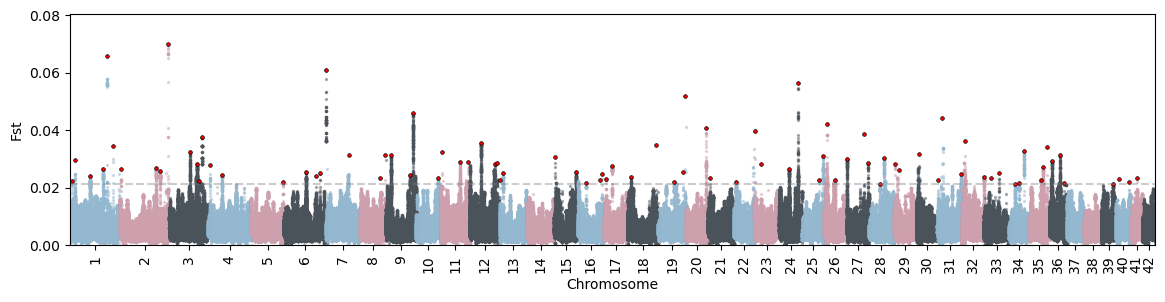

In [124]:
df = sites.copy().reset_index(drop=False)
df.columns = ['region', 'chr', 'ps', "nsites", "fst01"]
df = df[["ps", "chr", "fst01"]]

chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
chrmap["index"] = chrmap["index"] + 1
chrmap.columns = ["Chromosome", "Accession"]
chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

df.loc[df["fst01"] < 0, "fst01"] = 0
threshold = np.percentile(df.fst01, 99.9)
upper_1_percent = df.fst01[df.fst01 >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["fst01"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='fst01',
               color=colors[num % len(colors)], ax=ax, alpha = 0.4, s = 2)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='fst01',
               color="red", ax=ax, alpha = 1, s = 7, edgecolors='black', linewidth=0.5) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("fst01", ascending=False).reset_index(drop=True)["fst01"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('Fst')
plt.xticks(rotation = 90)
# show the graph
plt.show()

In [126]:
!cat /storage/home/nsl5160/scratch/brook_trout/fst_scans/wild.hatchery.fst.global

0.000801	0.005508


In [127]:
sites = pd.read_csv("/storage/home/nsl5160/scratch/brook_trout/fst_scans/Temiscamie.Windfall.Domestic.fst2.window", sep = "\t")

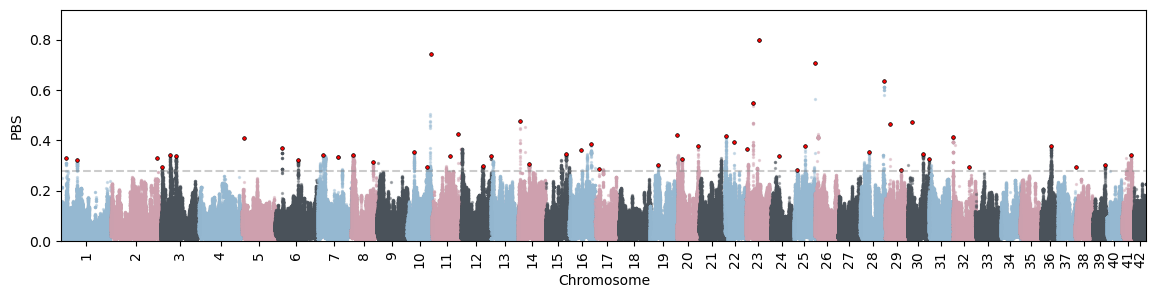

In [141]:
df = sites.copy()
df.columns = ['region', 'chr', 'ps', "nsites", "fst01", "fst02", 
              "fst12", "PBS0", 'PBS1', 'PBS2']
df = df[["ps", "chr", "PBS2"]]

chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
chrmap["index"] = chrmap["index"] + 1
chrmap.columns = ["Chromosome", "Accession"]
chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

df.loc[df["PBS2"] < 0, "PBS2"] = 0
threshold = np.percentile(df.PBS2, 99.9)
upper_1_percent = df.PBS2[df.PBS2 >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["PBS2"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='PBS2',
               color=colors[num % len(colors)], ax=ax, alpha = 0.4, s = 2)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='PBS2',
               color="red", ax=ax, alpha = 1, s = 7, edgecolors='black', linewidth=0.5) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("PBS2", ascending=False).reset_index(drop=True)["PBS2"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('PBS')
plt.xticks(rotation = 90)
# show the graph
plt.show()

In [129]:
gnomon = pd.read_csv("../references/GCF_029448725.1_ASM2944872v1_feature_table.txt", sep = "\t")

In [130]:
gnomon[["genomic_accession", "start", "end"]][~gnomon["# feature"].isin(["gene", "CDS", "V_segment", "C_region"])].to_csv("../references/features.bed", 
                                                     sep = "\t", index = False, header = None)

In [131]:
peaks = df[df["index"] == 1]
peaks["start"] = peaks["ps"] - 1
peaks[["accession", "start", "ps"]].to_csv("../references/peaks.bed", header = None, index = False, sep = "\t")

/tmp/ipykernel_1572754/4117904504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks["start"] = peaks["ps"] - 1


In [132]:
%%bash
source ~/.bashrc
conda activate ipyrad
bedtools closest -D a -b ../references/features.bed \
    -a ../references/peaks.bed > ../references/gene_overlaps.bed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [133]:
overlaps = pd.read_csv("../references/gene_overlaps.bed", sep = "\t", header = None)
overlaps.columns = ["accession", "psstart", "ps", "genomic_accession", "start", "end", "distance"]
overlaps = overlaps.merge(gnomon[~gnomon["# feature"].isin(["gene", "CDS", "V_segment", "C_region"])], 
               how = "left", on = ["genomic_accession", "start", "end"])
overlaps = overlaps.sort_values(["accession", "start", "end", "product_length"], 
                                ascending = True).drop_duplicates(["accession", 
                                                                   "start", "end"], 
                                                                  keep = "first").reset_index(drop=True)
overlaps = overlaps.merge(df, how = "left", on = ["accession", "ps"]).sort_values("PBS2")

In [140]:
overlaps.drop_duplicates("symbol")

,accession,psstart,ps,genomic_accession,start,end,distance,# feature,class,assembly,...,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes,chr,PBS2,index,ind
58,NC_074689.1,6203999,6204000,NC_074689.1,6196555,6241077,0,mRNA,NaN,GCF_029448725.1,...,LOC129822806,129822806,NaN,5832,5832.0,NaN,25,0.280699,1,1495008
65,NC_074693.1,31570999,31571000,NC_074693.1,31701799,31706446,130800,mRNA,NaN,GCF_029448725.1,...,LOC129827835,129827835,NaN,3752,3752.0,NaN,29,0.281225,1,1706061
39,NC_074681.1,6549999,6550000,NC_074681.1,6573444,6577978,23445,mRNA,NaN,GCF_029448725.1,...,LOC129813640,129813640,NaN,2976,2977.0,NaN,17,0.285250,1,1092005
26,NC_074674.1,39123999,39124000,NC_074674.1,39210221,39237008,86222,mRNA,NaN,GCF_029448725.1,...,LOC129864133,129864133,NaN,4895,4895.0,NaN,10,0.292018,1,742225
6,NC_074667.1,3723999,3724000,NC_074667.1,3658691,3777836,0,mRNA,NaN,GCF_029448725.1,...,LOC129836180,129836180,NaN,10999,10999.0,NaN,3,0.294280,1,205460
72,NC_074702.1,1836999,1837000,NC_074702.1,1564147,1807705,-29295,mRNA,NaN,GCF_029448725.1,...,LOC129837175,129837175,NaN,2684,2684.0,NaN,38,0.294297,1,2062103
70,NC_074696.1,32810999,32811000,NC_074696.1,32692287,32694257,-116743,mRNA,NaN,GCF_029448725.1,...,LOC129830552,129830552,NaN,867,867.0,partial,32,0.294916,1,1845173
31,NC_074676.1,43128999,43129000,NC_074676.1,43118782,43140728,0,mRNA,NaN,GCF_029448725.1,...,gipc3,129867437,NaN,2837,2837.0,NaN,12,0.296879,1,856125
76,NC_074703.1,24812999,24813000,NC_074703.1,24392246,24762877,-50123,mRNA,NaN,GCF_029448725.1,...,LOC129838763,129838763,NaN,3971,3971.0,NaN,39,0.300324,1,2121703
42,NC_074683.1,17445999,17446000,NC_074683.1,17297430,17550662,0,mRNA,NaN,GCF_029448725.1,...,nalcn,129816446,NaN,8300,8300.0,NaN,19,0.301657,1,1213248


In [206]:
for i in overlaps["related_accession"]:
    try:
        subprocess.run(["source ~/.bashrc ; conda activate assembly ;" + 
                    "seqkit grep -r -n -p '" + i +  
                    "*' ../references/GCF_029448725.1_ASM2944872v1_protein.faa " + 
                    ">> ../selected_proteins.fa"], shell = True)
    except:
        pass

In [211]:
!grep "^>" ../selected_proteins.fa

>XP_055774794.1 vertebrate ancient opsin-like [Salvelinus fontinalis]
>XP_055752126.1 uncharacterized protein LOC129832123 isoform X1 [Salvelinus fontinalis]
>XP_055752079.1 uncharacterized protein LOC129832123 isoform X1 [Salvelinus fontinalis]
>XP_055751935.1 uncharacterized protein LOC129832123 isoform X1 [Salvelinus fontinalis]
>XP_055752148.1 coiled-coil domain-containing protein 97-like isoform X3 [Salvelinus fontinalis]
>XP_055758030.1 VPS10 domain-containing receptor SorCS1-like isoform X3 [Salvelinus fontinalis]
>XP_055758022.1 VPS10 domain-containing receptor SorCS1-like isoform X2 [Salvelinus fontinalis]
>XP_055758016.1 VPS10 domain-containing receptor SorCS1-like isoform X2 [Salvelinus fontinalis]
>XP_055764529.1 ras-related protein Rab-22A isoform X1 [Salvelinus fontinalis]
>XP_055764537.1 ras-related protein Rab-22A isoform X2 [Salvelinus fontinalis]
>XP_055768280.1 calcium-dependent secretion activator 1-like isoform X9 [Salvelinus fontinalis]
>XP_055768276.1 calcium-dep

In [197]:
!grep -A50 "XP_055744151.1" ../references/GCF_029448725.1_ASM2944872v1_protein.faa

>XP_055744151.1 interleukin-12 subunit beta-like [Salvelinus fontinalis]
MFDCCLKMRFTLLSILPTLLGVLILHQAKSQSPKFTQSSWNLLPNVVVVNVDGSLVQHPLTCMGSFDREEEGWRRDNDWV
WRRDGEEDEEIIWMMGEEEKKKGNSFLVNLEERTGGGIFTCHSLDRTLLKKTTVLVKHLDEQKRILEGSTRTGYMKCSTR
NYQGEFHCSWKFTPTRVGTVMFVKVARGLSDTENISCSVDASGQQWTCSSSSGQSDIMCSVNSSGLGVSCVDRQYCPYAE
ETDRITLTIYMRTNYLLEEYSQRFYLSDIVKPDNVYIKEVNSSTIEWSYPVSWNRPISYFPLSFQVKEIEGRKCKNGCTC
DSPYTEVHTTESSQWSVKAKVTVCVRAQDALCDSPWSDWTEHRLSSKGSRRGRQEKQKKKKQKKKKQKKKKNVPQ
>XP_055744152.1 SH3 domain and tetratricopeptide repeat-containing protein 2 isoform X1 [Salvelinus fontinalis]
MAWCCCTPLRASSSSCCSPLLKRCPLFPDISPAELDALWREPPYTLAGTNEHFTGNDVMNRGEEEGPGVESGEGEAELDS
YWTRKEAFTRGSTVSLAVGERFSSDVVLVFSGRRCSGVTPDSELQEALRTRLRVVESNSQDVIQLFKDLSARLLSVHAEK
DSFVITFKTVEEIWKFSTYLALGYVARCLENFLCDQSFWLDTELRRDLEITVSVDEEHLATLYLGLLLQEGSFFAKALVS
SGEHSDEEEELCFRRNDLLMVRDTGQDSRWEGTLLSTGQHGLVPVNTMQPLPYPFYQWFLRKYSDCAGCSPSEREQFDHP
IVTGFCEAVVDHNPVGSDELQLSQGDLIEIEGMLLRGLDLFIGTHCSTGNTGFVHKAHVKPLNAKPPDGQLVFLSEEERA
SMAQINPCSS

In [195]:
!head -2000 ../selected_proteins.fa

>XP_055774794.1 vertebrate ancient opsin-like [Salvelinus fontinalis]
MDNIIIAVNGVSYNEAAEIYKPHADPFTGPITHLAPWNFAVLATLMFVVTSLSLFENFTV
MLATYKFKQLRQPLNYIIVNLSVADFLVSLTGGTISFLTNAKGYFFLGNWACVLEGFAVT
YFGIVALWSLAVLSFERFFVICRPLGNVRLRGKHAAMGLLFVWTFSFIWTIPPVFGWCSY
TVSKIGTTCEPNWYSNNISNHTYIITFFVTCFIMPLGVIIYCYGKLLQKLRKVSHGRLGN
AKKPERQVTRMVVVMIVAFMVGWTPYAAFSIIVTACPTIYLDPRLAAAPAFFSKTAAVYN
PVIYVFMNKQFRKCLIQLFTGKPAPENMNATSERLGMTGESCTGGEMSAIAARIPVCGNT
QPKNEEASPRKCRSFVQLPIPENKVCPM
>XP_055752148.1 coiled-coil domain-containing protein 97-like isoform X3 [Salvelinus fontinalis]
MWGEIDPAPDPSPPVSVEPVAFRQPEPRRPQPEPRRPQPEPRRPPPEPRGTGPASSCSAT
AHTEEDEPQDESQDNQADPSGVCAMVEVVAVSSVQVKSQQVGEAELTLAQRREELLGQYR
TKPLVFLERYQAHLKPQHLSAFCHLTSDPRAQYYCREVRRRAAGRANRTRVRNQRYAALR
ELQREGQYFSEDQMRTREPLLYEQYIGQYLTEEELLHRSLEAMQGGAAEERGPGGAEGGL
ADLLLSSYQERLIQSRLQEEQDREENALEEEEEEGEEGGGLGAEGYEPTPQEKALLRDEF
ITQMYQRFLDGHDKDFNYREVDGNPDYDNLDIVNRDAEEKYFDEDEEEEEEEEEDMTIVM
S
>XP_055764529.1 ras-related protein Rab-22A isoform X1 [Salvelinus fon

In [196]:
overlaps

,accession,psstart,ps,genomic_accession,start,end,distance,# feature,class,assembly,...,product_accession,non-redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
0,NC_074665.1,31540999,31541000,NC_074665.1,31507738,31536491,-4509,mRNA,NaN,GCF_029448725.1,...,XM_055918819.1,NaN,XP_055774794.1,vertebrate ancient opsin-like,LOC129853102,129853102,NaN,2155,2155.0,NaN
1,NC_074666.1,94304999,94305000,NC_074666.1,94367031,94380423,62032,mRNA,NaN,GCF_029448725.1,...,XM_055896173.1,NaN,XP_055752148.1,"coiled-coil domain-containing protein 97-like,...",LOC129832123,129832123,NaN,1577,1577.0,NaN
2,NC_074667.1,19192999,19193000,NC_074667.1,19174747,19197274,0,mRNA,NaN,GCF_029448725.1,...,XM_055908554.1,NaN,XP_055764529.1,"ras-related protein Rab-22A, transcript varian...",LOC129840574,129840574,NaN,3797,3797.0,NaN
3,NC_074669.1,2567999,2568000,NC_074669.1,2474131,2600492,0,mRNA,NaN,GCF_029448725.1,...,XM_055924301.1,NaN,XP_055780276.1,epidermal growth factor receptor kinase substr...,LOC129856187,129856187,NaN,2722,2722.0,NaN
4,NC_074670.1,14117999,14118000,NC_074670.1,14022136,14071596,-46404,mRNA,NaN,GCF_029448725.1,...,XM_055925050.1,NaN,XP_055781025.1,"phospholipid-transporting ATPase ID-like, tran...",LOC129857111,129857111,NaN,658,658.0,NaN
5,NC_074671.1,42112999,42113000,NC_074671.1,42202604,42240708,89605,mRNA,NaN,GCF_029448725.1,...,XM_055929319.1,NaN,XP_055785294.1,transmembrane protein 163-like,LOC129859482,129859482,NaN,893,893.0,NaN
6,NC_074672.1,44482999,44483000,NC_074672.1,44471269,44472514,-10486,mRNA,NaN,GCF_029448725.1,...,XM_055932617.1,NaN,XP_055788592.1,aerolysin-like protein,LOC129861309,129861309,NaN,844,844.0,NaN
7,NC_074674.1,49236999,49237000,NC_074674.1,49270474,49315548,33475,mRNA,NaN,GCF_029448725.1,...,XM_055936946.1,NaN,XP_055792921.1,layilin a,layna,129864239,NaN,2509,2509.0,NaN
8,NC_074675.1,37526999,37527000,NC_074675.1,37663176,37670812,136177,mRNA,NaN,GCF_029448725.1,...,XM_055938604.1,NaN,XP_055794579.1,zinc finger protein 239-like,LOC129865658,129865658,NaN,2139,2139.0,NaN
9,NC_074676.1,43128999,43129000,NC_074676.1,43118782,43140728,0,mRNA,NaN,GCF_029448725.1,...,XM_055940848.1,NaN,XP_055796823.1,"GIPC PDZ domain containing family, member 3",gipc3,129867437,NaN,2837,2837.0,NaN


Progress:   0%|          | 0/3 [09:18<?, ?it/s]
Traceback (most recent call last):
  File "proteinfer.py", line 425, in <module>
    app.run(main)
  File "/storage/group/ibb3/default/.conda/envs/proteinfer/lib/python3.7/site-packages/absl/app.py", line 300, in run
    _run_main(main, args)
  File "/storage/group/ibb3/default/.conda/envs/proteinfer/lib/python3.7/site-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "proteinfer.py", line 418, in main
    reporting_threshold=FLAGS.reporting_threshold)
  File "proteinfer.py", line 401, in load_assets_and_run
    label_to_description)
  File "proteinfer.py", line 366, in run
    reporting_threshold=reporting_threshold)
  File "proteinfer.py", line 227, in perform_inference
    reporting_threshold))
  File "/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/proteinfer/inference.py", line 505, in get_preds_at_or_above_threshold
    for inferrer in inferrer_list
  File "/storage/group/ibb3/default/acer_cnat_d

In [106]:
gnomon

,# feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non-redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
0,gene,protein_coding,GCF_029448725.1,Primary Assembly,chromosome,1.0,NC_074665.1,185835,191701,+,NaN,NaN,NaN,microtubule associated protein 10,map10,129865464,NaN,5867,NaN,NaN
1,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,1.0,NC_074665.1,185835,191701,+,XM_055938289.1,NaN,XP_055794264.1,microtubule associated protein 10,map10,129865464,NaN,5724,5724.0,NaN
2,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,1.0,NC_074665.1,186142,190136,+,XP_055794264.1,NaN,XM_055938289.1,uncharacterized protein map10,map10,129865464,NaN,3852,1283.0,NaN
3,gene,protein_coding,GCF_029448725.1,Primary Assembly,chromosome,1.0,NC_074665.1,202124,268294,+,NaN,NaN,NaN,"nucleoside-triphosphatase, cancer-related",ntpcr,129862414,NaN,66171,NaN,NaN
4,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,1.0,NC_074665.1,202124,268294,+,XM_055934115.1,NaN,XP_055790090.1,"nucleoside-triphosphatase, cancer-related, tra...",ntpcr,129862414,NaN,1118,1118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244999,mRNA,NaN,GCF_029448725.1,Primary Assembly,unplaced scaffold,NaN,NW_026602862.1,336,10194,+,XM_055917140.1,NaN,XP_055773115.1,"myosin heavy chain, fast skeletal muscle-like",LOC129851003,129851003,NaN,3268,3268.0,NaN
245000,CDS,with_protein,GCF_029448725.1,Primary Assembly,unplaced scaffold,NaN,NW_026602862.1,336,10193,+,XP_055773115.1,NaN,XM_055917140.1,"myosin heavy chain, fast skeletal muscle-like",LOC129851003,129851003,NaN,3267,1088.0,NaN
245001,gene,protein_coding,GCF_029448725.1,Primary Assembly,unplaced scaffold,NaN,NW_026602888.1,1590,9972,-,NaN,NaN,NaN,TOM1-like protein 2,LOC129851004,129851004,NaN,8383,NaN,NaN
245002,mRNA,NaN,GCF_029448725.1,Primary Assembly,unplaced scaffold,NaN,NW_026602888.1,1590,9972,-,XM_055917142.1,NaN,XP_055773117.1,TOM1-like protein 2,LOC129851004,129851004,NaN,1314,1314.0,NaN


In [8]:
gnomon = pd.read_csv("../references/GCF_029448725.1_ASM2944872v1_feature_table.txt", sep = "\t")

In [10]:
gnomon[gnomon["genomic_accession"] == "NC_074689.1"][gnomon["start"] > 42484000 ][gnomon["end"] < 42684000 ].tail(20)

/tmp/ipykernel_1377876/3132191971.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gnomon[gnomon["genomic_accession"] == "NC_074689.1"][gnomon["start"] > 42484000 ][gnomon["end"] < 42684000 ].tail(20)


,# feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non-redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
148279,gene,protein_coding,GCF_029448725.1,Primary Assembly,chromosome,25.0,NC_074689.1,42486719,42624706,+,NaN,NaN,NaN,natural killer cell triggering receptor,nktr,129823291,NaN,137988,NaN,partial
148280,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,25.0,NC_074689.1,42486719,42624706,+,XM_055882226.1,NaN,XP_055738201.1,natural killer cell triggering receptor,nktr,129823291,NaN,6583,6968.0,partial
148281,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,25.0,NC_074689.1,42497794,42622257,+,XP_055738201.1,NaN,XM_055882226.1,NK-tumor recognition protein,nktr,129823291,NaN,4004,1462.0,partial


In [160]:
gnomon[gnomon["genomic_accession"] == "NC_074692.1"][gnomon["start"] > 46042000][gnomon["end"] < 49002000].tail(20)

/tmp/ipykernel_2065856/1775973876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gnomon[gnomon["genomic_accession"] == "NC_074692.1"][gnomon["start"] > 46042000][gnomon["end"] < 49002000].tail(20)


,# feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non-redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
162511,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,47933557,48316639,+,XM_055887878.1,NaN,XP_055743853.1,"KN motif and ankyrin repeat domains 1a, transc...",kank1a,129826800,NaN,13812,13812.0,NaN
162512,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,47933557,48316639,+,XM_055887877.1,NaN,XP_055743852.1,"KN motif and ankyrin repeat domains 1a, transc...",kank1a,129826800,NaN,13809,13809.0,NaN
162513,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,47933557,48316639,+,XM_055887880.1,NaN,XP_055743855.1,"KN motif and ankyrin repeat domains 1a, transc...",kank1a,129826800,NaN,13750,13750.0,NaN
162514,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,48008095,48316639,+,XM_055887879.1,NaN,XP_055743854.1,"KN motif and ankyrin repeat domains 1a, transc...",kank1a,129826800,NaN,13592,13592.0,NaN
162515,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,48101595,48307199,+,XP_055743852.1,NaN,XM_055887877.1,KN motif and ankyrin repeat domain-containing ...,kank1a,129826800,NaN,4044,1347.0,NaN
162516,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,48101595,48307199,+,XP_055743853.1,NaN,XM_055887878.1,KN motif and ankyrin repeat domain-containing ...,kank1a,129826800,NaN,4044,1347.0,NaN
162517,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,48101595,48307199,+,XP_055743854.1,NaN,XM_055887879.1,KN motif and ankyrin repeat domain-containing ...,kank1a,129826800,NaN,4044,1347.0,NaN
162518,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,48101595,48307199,+,XP_055743855.1,NaN,XM_055887880.1,KN motif and ankyrin repeat domain-containing ...,kank1a,129826800,NaN,4044,1347.0,NaN
162519,gene,protein_coding,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,48657951,48670723,+,NaN,NaN,NaN,doublesex- and mab-3-related transcription fac...,LOC129825796,129825796,NaN,12773,NaN,NaN
162520,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,28.0,NC_074692.1,48657951,48670723,+,XM_055885938.1,NaN,XP_055741913.1,doublesex- and mab-3-related transcription fac...,LOC129825796,129825796,NaN,475,475.0,NaN


In [155]:
gnomon.value_counts("genomic_accession").head(60)

genomic_accession
NC_074666.1       10590
NC_074667.1       10020
NC_074670.1        8912
NC_074668.1        8703
NC_074665.1        8439
NC_074669.1        6780
NC_074675.1        6400
NC_074671.1        6250
NC_074677.1        5916
NC_074672.1        5910
NC_074682.1        5735
NC_074685.1        5588
NC_074674.1        5439
NC_074673.1        5424
NC_074692.1        5386
NC_074698.1        5355
NC_074681.1        5085
NC_074676.1        5065
NC_074690.1        5026
NC_074695.1        5026
NC_074678.1        4921
NC_074702.1        4865
NC_074697.1        4695
NC_074679.1        4669
NC_074686.1        4579
NC_074693.1        4387
NC_074696.1        4378
NC_074704.1        4337
NC_074688.1        4294
NC_074683.1        4264
NC_074687.1        4183
NC_074680.1        4096
NC_074701.1        3985
NC_074691.1        3888
NC_074684.1        3782
NC_074699.1        3741
NC_074694.1        3591
NC_074700.1        3270
NC_074689.1        3247
NC_074703.1        3103
NC_074706.1        299

In [39]:
for combo in range(len(combos)):
    task = "fst_calc"
    mem = "500"
    cpus = "40"
    indir = "/storage/home/nsl5160/scratch/brook_trout/fst_scans/"
    strain1 = combos[combo].split(",")[0].replace(" ", "_")
    strain2 = combos[combo].split(",")[1].replace(" ", "_")
    strain3 = combos[combo].split(",")[2].replace(" ", "_")
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + strain3 ], shell=True)

Submitted batch job 29350812
Submitted batch job 29350813
Submitted batch job 29350815
Submitted batch job 29350816
Submitted batch job 29350817
Submitted batch job 29350818
Submitted batch job 29350819
Submitted batch job 29350820
Submitted batch job 29350821
Submitted batch job 29350822
Submitted batch job 29350823
Submitted batch job 29350824
Submitted batch job 29350825
Submitted batch job 29350826
Submitted batch job 29350827
Submitted batch job 29350828
Submitted batch job 29350829
Submitted batch job 29350830
Submitted batch job 29350831
Submitted batch job 29350832
